# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re

import inflection
from matplotlib              import pyplot as plt
from plotly                  import express as px
from IPython.core.display    import HTML

from sklearn                 import cluster as c
from yellowbrick.cluster     import KElbowVisualizer, SilhouetteVisualizer
from sklearn                 import metrics as m
from sklearn                 import manifold as mn
from pandas_profiling        import ProfileReport
from sklearn.preprocessing   import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble        import RandomForestRegressor 

## Helper funtions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['re']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# load data

In [4]:
df_raw = pd.read_csv('../data/raw/Ecommerce.csv',encoding= 'unicode_escape')

In [5]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [6]:
df1 = df_raw.copy()

**data dimensions**

In [7]:
df1.shape

(541909, 9)

**Rename columns**

In [8]:
old_cols = df1.columns
snakecase = lambda x: inflection.underscore(x)
new_cols = list(map(snakecase,old_cols))
df1.columns = new_cols

In [9]:
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country', 'unnamed: 8'],
      dtype='object')

**delete column**

In [10]:
df1.drop(columns='unnamed: 8',inplace=True)

In [11]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# Data types

In [12]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

# Checking NA

In [13]:
df1.isnull().sum()/len(df_raw)*100

invoice_no       0.000000
stock_code       0.000000
description      0.268311
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     24.926694
country          0.000000
dtype: float64

## replace NA

In [14]:
df_missing = df1.loc[df1['customer_id'].isna(),:]
df_missing.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,29-Nov-16,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,29-Nov-16,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,29-Nov-16,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,29-Nov-16,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,29-Nov-16,1.66,NaN,United Kingdom


In [15]:
df_not_missing = df1.loc[~df1['customer_id'].isna(),:]
df_not_missing

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France


In [16]:
# create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000,19000+len(df_backup),1)

#merge original with reference
df1 = pd.merge(df1,df_backup,on='invoice_no',how='left')

#coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

df1 = df1.drop(columns=['customer_id_x','customer_id_y'])

In [17]:
df1.isnull().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [18]:
df_backup.head()

,invoice_no,customer_id
622,536414,19000
1443,536544,19001
1970,536545,19002
1971,536546,19003
1972,536547,19004


In [19]:
1- df1.shape[0]/df_raw.shape[0]

0.0

In [20]:
df1.isnull().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

# Changing types

In [21]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'],format='%d-%b-%y')

In [22]:
#df1['invoice_no'].astype(int)

In [23]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id            float64
dtype: object

'Invoice_no' possui letras em algumas linhas, necessita de limpeza mais detalhada

# Data description

In [24]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850.0


'invoice_no', : categorical atributtes

'stock_code': categorical atributtes

'description': categorical atributtes

'quantity': numerical atributtes

'invoice_date': numerical atributtes

'unit_price': numerical atributtes

'customer_id': categorical atributtes

'country': categorical atributtes

In [25]:
num_atributtes = df1[['quantity','unit_price','invoice_date']]
cat_atributtes = df1[['customer_id','description','country','invoice_no','stock_code']]

## numerical statistcs

In [26]:
num_statistcs = num_atributtes.agg(['min','max','mean','median','std','skew','kurtosis']).T
num_statistcs['range'] = num_statistcs['max'] - num_statistcs['min']
num_statistcs= num_statistcs[['min','max','range','mean','median','std','skew','kurtosis']]
num_statistcs

,min,max,range,mean,median,std,skew,kurtosis
quantity,-80995.0,80995.0,161990.0,9.55225,3.0,218.081158,-0.264076,119769.160031
unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759853,186.506972,59005.719097
invoice_date,2016-11-29 00:00:00,2017-12-07 00:00:00,373 days 00:00:00,2017-07-02 00:00:13.073782016,2017-07-17 00:00:00,115 days 21:02:59.177457004,NaN,NaN


1. - Quantity negativa (pode ser devolução)
2. - Preço unitário igual a zero (promoção?)

## Categorical statistcs

In [27]:
cat_atributtes.apply(lambda x: x.unique().shape[0])

customer_id     8082
description     4224
country           38
invoice_no     25900
stock_code      4070
dtype: int64

In [28]:
# Invoice no
df_letter_invoice = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x))),:]
df_letter_invoice

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,United Kingdom,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,United Kingdom,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548.0
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,United Kingdom,14397.0
541541,C581499,M,Manual,-1,2017-12-07,224.69,United Kingdom,15498.0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,United Kingdom,15311.0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,United Kingdom,17315.0


In [29]:
len(df_letter_invoice)

9291

Todas os pedidos que possuem letra no 'invoice_no', também possuem valores positivos de quantidade

In [30]:
len(df1[df1['quantity']<0])

10624

A quantidade de pedidos que tem 'quantity' menor ou igual a zero é igual a quantidade de pedidos que possuem letra no código 'invoice_no' 

Logo se supõem que pedidos com letras no 'inovice_no' são devoluções

In [31]:
# stock code
cat_atributtes.loc[cat_atributtes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$',x))),'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [32]:
# description
# remoção da descrição

In [33]:
cat_atributtes['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [34]:
cat_atributtes['country'].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

Remover 'European Community' e 'Unspecified'

# Filter

In [35]:
df2 = df1.copy()

In [36]:
# unit price > 0.0
df2 = df2.loc[df2['unit_price'] > 0.040,:]

#stock code != ['POST','D','M','DOT','CRUK','C2']
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK','C2'])]

# description
df2.drop(columns='description',inplace=True)

# country
df2 = df2[~df2['country'].isin(['European Community','Unspecified'])]


df2 = df2[~df2['customer_id'].isin([16446])]


# description
## quantity - Negative numbers means product returns
df_returns = df2.loc[df2['quantity']<0,:]
df_purchase = df2.loc[df2['quantity']>0,:]

# Features enginering

In [37]:
df3 = df2.copy()

In [38]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850.0


## Feature creation

In [39]:
df_ref = pd.DataFrame(df3['customer_id'])

In [40]:
df_ref =  df_ref.drop_duplicates(ignore_index=True)

### Receita bruta

**Gross Revenue**

In [41]:
df_purchase.loc[:,'gross_revenue'] = df_purchase.loc[:,'quantity'] * df_purchase.loc[:,'unit_price']
df_monetary = df_purchase[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref,df_monetary,on='customer_id',how='left')

C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


### Rencencia - dias da ultima compra

In [42]:
df_recency = df_purchase[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max()- df_recency['invoice_date']).dt.days
df_recency = df_recency.drop(columns = 'invoice_date')
df_ref = pd.merge(df_ref,df_recency,on='customer_id',how='left')

### Quantidade de compras

In [43]:
df_purc_quant = (df_purchase[['customer_id','invoice_no']].drop_duplicates()
                                                         .groupby('customer_id')
                                                         .count()
                                                         .reset_index()
                                                         .rename(columns = {'invoice_no':'qtde_invoice'}))
df_ref = pd.merge(df_ref,df_purc_quant,on='customer_id',how='left')

### Quantidade de itens comprados

In [44]:
df_item_quant = (df_purchase[['customer_id','quantity']].groupby('customer_id')
                                                       .sum()
                                                       .reset_index()
                                                       .rename(columns = {'quantity':'qtde_items'}))
df_ref = pd.merge(df_ref,df_item_quant,on='customer_id',how='left')

### Quantidade de produtos comprados

In [45]:
df_prod_quant = (df_purchase[['customer_id','stock_code']].groupby('customer_id')
                                                       .count()
                                                       .reset_index()
                                                       .rename(columns = {'stock_code':'qtde_products'}))
df_ref = pd.merge(df_ref,df_prod_quant,on='customer_id',how='left')

### Quantidade  de produtos comprados por cesta (basket size)

In [46]:
df_aux = (df_purchase.loc[:,['customer_id','invoice_no','quantity']].groupby('customer_id')
                                                          .agg(n_purchase = ('invoice_no','nunique'),
                                                               n_products = ('quantity','sum'))
                                                          .reset_index())

df_aux['avg_basket_size'] = df_aux['n_products']/df_aux['n_purchase']

#merge
df_ref = pd.merge(df_ref,df_aux[['avg_basket_size','customer_id']],on='customer_id',how='left')

### Quantidade  de produtos unicos comprados por compra (basket size)

In [47]:
df_aux = (df_purchase.loc[:,['customer_id','invoice_no','stock_code']].groupby('customer_id')
                                                          .agg(n_purchase = ('invoice_no','nunique'),
                                                               n_products = ('stock_code','count'))
                                                          .reset_index())

df_aux['avg_unique_basket_size'] = df_aux['n_products']/df_aux['n_purchase']

#merge
df_ref = pd.merge(df_ref,df_aux[['avg_unique_basket_size','customer_id']],on='customer_id',how='left')

### Frequência

**Frequência**

In [48]:
df_aux = (df3[['customer_id','invoice_no','invoice_date']].drop_duplicates()
                                                          .groupby('customer_id')
                                                          .agg(max_ = ('invoice_date','max'),
                                                               min_ = ('invoice_date','min'),
                                                               days_ = ('invoice_date',lambda x:(x.max()-x.min()).days+1),
                                                               buy_  = ('invoice_date','count'))
                                                          .reset_index())
                                                          

df_aux['freq'] = df_aux.apply(lambda x: x['buy_']/x['days_'] if x['days_'] !=0 else 0,axis=1)
df_ref = pd.merge(df_ref,df_aux[['customer_id','freq']],on='customer_id',how='left')

In [49]:
df_ref.isnull().sum()

customer_id                0
gross_revenue             91
recency_days              91
qtde_invoice              91
qtde_items                91
qtde_products             91
avg_basket_size           91
avg_unique_basket_size    91
freq                       0
dtype: int64

### Valor médio do ticket

**Average ticket**

In [50]:
df_avg_ticket = df_purchase[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref,df_avg_ticket,on='customer_id',how='left')

### Média de recência em dias

In [51]:
df_aux = df3.loc[:,['customer_id','invoice_date']].drop_duplicates().sort_values(['customer_id','invoice_date'],ascending=['False','False'])
df_aux['next_customer_id'] = df_aux['customer_id'].shift()
df_aux['prev_invoice_date'] = df_aux['invoice_date'].shift()
df_aux['avg_rec_days'] = df_aux.apply(lambda x: (x['invoice_date'] - x['prev_invoice_date']).days if (x['next_customer_id'] == x['customer_id']) else np.nan, axis=1)
df_aux = df_aux.drop(columns=['invoice_date','next_customer_id','prev_invoice_date']).dropna()
df_avf_rec = df_aux.groupby('customer_id').mean().reset_index()
df_avf_rec.head()

# merge
df_ref = pd.merge(df_ref,df_avf_rec, on = 'customer_id',how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days
0,17850.0,5391.21,372.0,34.0,1733.0,297.0,50.970588,8.735294,0.486111,18.152222,35.500000
1,13047.0,3232.59,56.0,9.0,1390.0,171.0,154.444444,19.000000,0.048780,18.904035,27.250000
2,12583.0,6705.38,2.0,15.0,5028.0,232.0,335.200000,15.466667,0.045699,28.902500,23.187500
3,13748.0,948.25,95.0,5.0,439.0,28.0,87.800000,5.600000,0.017921,33.866071,92.666667
4,15100.0,876.00,333.0,3.0,80.0,3.0,26.666667,1.000000,0.136364,292.000000,8.600000


### Devoluções

**Returns**

In [52]:
df_avg_returns = df_returns[['customer_id','quantity']].drop_duplicates().groupby('customer_id').sum().abs().reset_index().rename(columns={'quantity':'qtde_returns'})
df_ref = pd.merge(df_ref,df_avg_returns,on='customer_id',how='left')
df_ref.loc[df_ref['qtde_returns'].isna(),'qtde_returns'] = 0

In [53]:
df_ref.isnull().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoice                91
qtde_items                  91
qtde_products               91
avg_basket_size             91
avg_unique_basket_size      91
freq                         0
avg_ticket                  91
avg_rec_days              2816
qtde_returns                 0
dtype: int64

In [54]:
df_ref = df_ref.dropna()

In [55]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
0,17850.0,5391.21,372.0,34.0,1733.0,297.0,50.970588,8.735294,0.486111,18.152222,35.500000,21.0
1,13047.0,3232.59,56.0,9.0,1390.0,171.0,154.444444,19.000000,0.048780,18.904035,27.250000,6.0
2,12583.0,6705.38,2.0,15.0,5028.0,232.0,335.200000,15.466667,0.045699,28.902500,23.187500,50.0
3,13748.0,948.25,95.0,5.0,439.0,28.0,87.800000,5.600000,0.017921,33.866071,92.666667,0.0
4,15100.0,876.00,333.0,3.0,80.0,3.0,26.666667,1.000000,0.136364,292.000000,8.600000,22.0


In [56]:
df4 = df_ref.copy()

In [494]:
df4.shape

(2968, 12)

# EDA

In [57]:
df5 = df4.copy()

In [58]:
df5.head()

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
0,17850.0,5391.21,372.0,34.0,1733.0,297.0,50.970588,8.735294,0.486111,18.152222,35.500000,21.0
1,13047.0,3232.59,56.0,9.0,1390.0,171.0,154.444444,19.000000,0.048780,18.904035,27.250000,6.0
2,12583.0,6705.38,2.0,15.0,5028.0,232.0,335.200000,15.466667,0.045699,28.902500,23.187500,50.0
3,13748.0,948.25,95.0,5.0,439.0,28.0,87.800000,5.600000,0.017921,33.866071,92.666667,0.0
4,15100.0,876.00,333.0,3.0,80.0,3.0,26.666667,1.000000,0.136364,292.000000,8.600000,22.0


## Univariate analysis

Clusters coeses - separados
métricas de variabilidade - min,max,range (dispersão)
                          - média e mediana
                          - desvio padrão e variância
                          - coeficiente de variação (desvio padrão / média)

In [59]:
# profile = ProfileReport(df5)
# profile.to_file('output_v2.html')

**gross_revenue**
    
    - Possivel outiler no valor: 279138.02 
    - variabilidade

**recency_days**

    - variabilidade

**qtde_invoice:**

    - variabilidade

**qtde_items**

    - possivel outlier no valor: 196844
    - variabilidade

**qtde_products:**

    - Possivel outlier no valor: 7837 
    - variablidade

**avg_basket_size:**

    - Possivel outlier no valor: 40498.5  
    - variablidade

**avg_unique_basket_size:**

    - baixa variabilidade

**freq:**

    - variablidade

**avg_ticket:**

    - Possivel outiler no valor: 56157.5 
    - alta variabilidade

**avg_rec_days:**

    - baixa variabilidade

**qtde_returns:**

    - Possivel outlier nos valores: 80995,9014 
    - Alta variabilidade


In [60]:
df5[df5['gross_revenue']==279138.02 ]

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
1017,14646.0,279138.02,1.0,72.0,196844.0,2060.0,2733.944444,28.611111,0.206215,135.503893,7.844444,144.0


In [61]:
df5[df5['qtde_items']==196844 ]

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
1017,14646.0,279138.02,1.0,72.0,196844.0,2060.0,2733.944444,28.611111,0.206215,135.503893,7.844444,144.0


In [62]:
df5[df5['qtde_products']==7837]

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
68,17841.0,40959.72,1.0,124.0,22853.0,7837.0,184.298387,63.201613,0.453083,5.226454,3.321429,38.0


In [63]:
df5[df5['avg_basket_size']==40498.5]

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns


In [64]:
df5[df5['qtde_returns']==9014]
#df3[df3['customer_id']==15749]

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
1262,15749.0,44534.3,235.0,3.0,18028.0,10.0,6009.333333,3.333333,0.040816,4453.43,97.0,9014.0


In [65]:
df5[df5['qtde_returns']==80995]

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns


In [66]:
#df5[df5['avg_ticket']==56157.5 ]
#df3[df3['customer_id']==16446 ]

Retirar o customer 16446

## Bivariate analysis

In [67]:
df_aux = df5.drop(columns='customer_id')

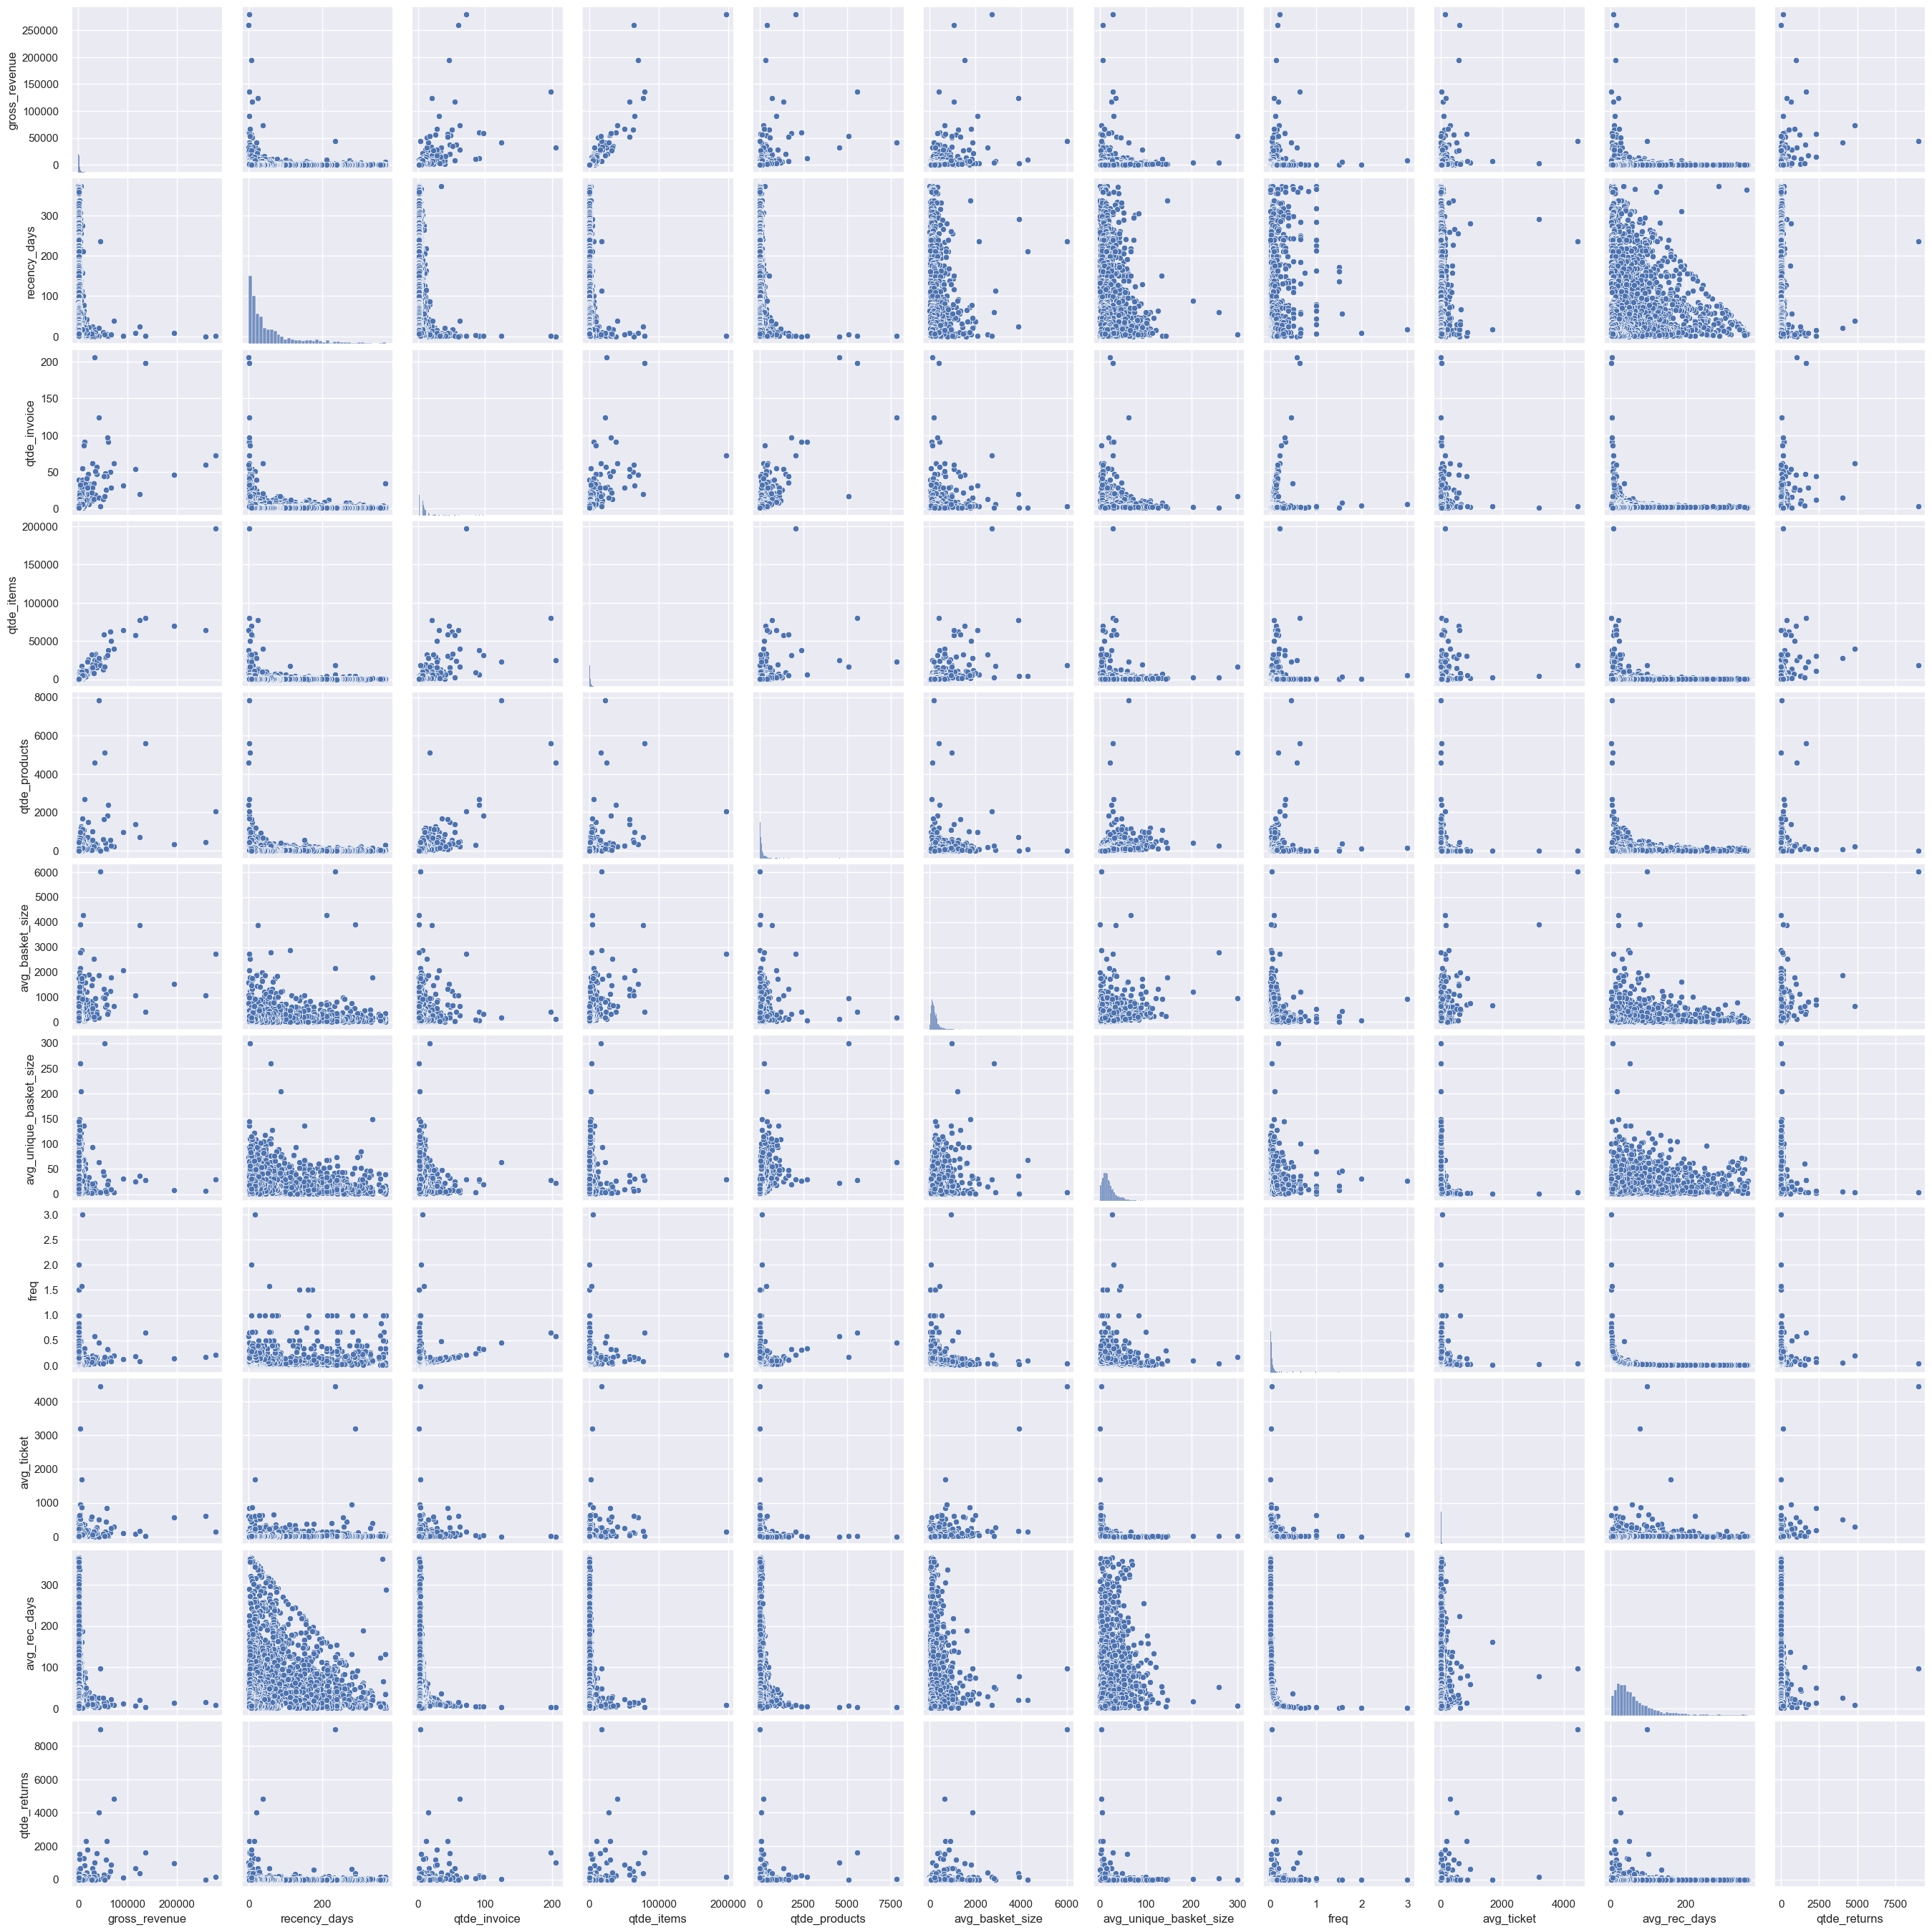

In [68]:
sns.pairplot(df_aux)

## Estudo do Espaço

In [69]:
cols_select = ['gross_revenue', 'recency_days', 'qtde_products', 'freq', 'qtde_returns']

In [70]:
df_aux = df_aux[cols_select]

In [71]:
df_aux.head()

,gross_revenue,recency_days,qtde_products,freq,qtde_returns
0,5391.21,372.0,297.0,0.486111,21.0
1,3232.59,56.0,171.0,0.048780,6.0
2,6705.38,2.0,232.0,0.045699,50.0
3,948.25,95.0,28.0,0.017921,0.0
4,876.00,333.0,3.0,0.136364,22.0


In [72]:
mm = MinMaxScaler()

df_aux['gross_revenue'] = mm.fit_transform(df_aux[['gross_revenue']])
df_aux['recency_days'] = mm.fit_transform(df_aux[['recency_days']])
# df_aux['qtde_invoice'] = mm.fit_transform(df_aux[['qtde_invoice']])
# df_aux['qtde_items'] = mm.fit_transform(df_aux[['qtde_items']])
df_aux['qtde_products'] = mm.fit_transform(df_aux[['qtde_products']])
# df_aux['avg_basket_size'] = mm.fit_transform(df_aux[['avg_basket_size']])
# df_aux['avg_unique_basket_size'] = mm.fit_transform(df_aux[['avg_unique_basket_size']])
df_aux['freq'] = mm.fit_transform(df_aux[['freq']])
# df_aux['avg_rec_days'] = mm.fit_transform(df_aux[['avg_rec_days']])
df_aux['qtde_returns'] = mm.fit_transform(df_aux[['qtde_returns']])
# df_aux['avg_ticket'] = mm.fit_transform(df_aux[['avg_ticket']])

C:\Users\Lavin\AppData\Local\Temp\ipykernel_11420\3756859699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['gross_revenue'] = mm.fit_transform(df_aux[['gross_revenue']])
C:\Users\Lavin\AppData\Local\Temp\ipykernel_11420\3756859699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['recency_days'] = mm.fit_transform(df_aux[['recency_days']])
C:\Users\Lavin\AppData\Local\Temp\ipykernel_11420\3756859699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [73]:
X = df_aux.copy()

### PCA

In [74]:
from sklearn import decomposition as  dcp

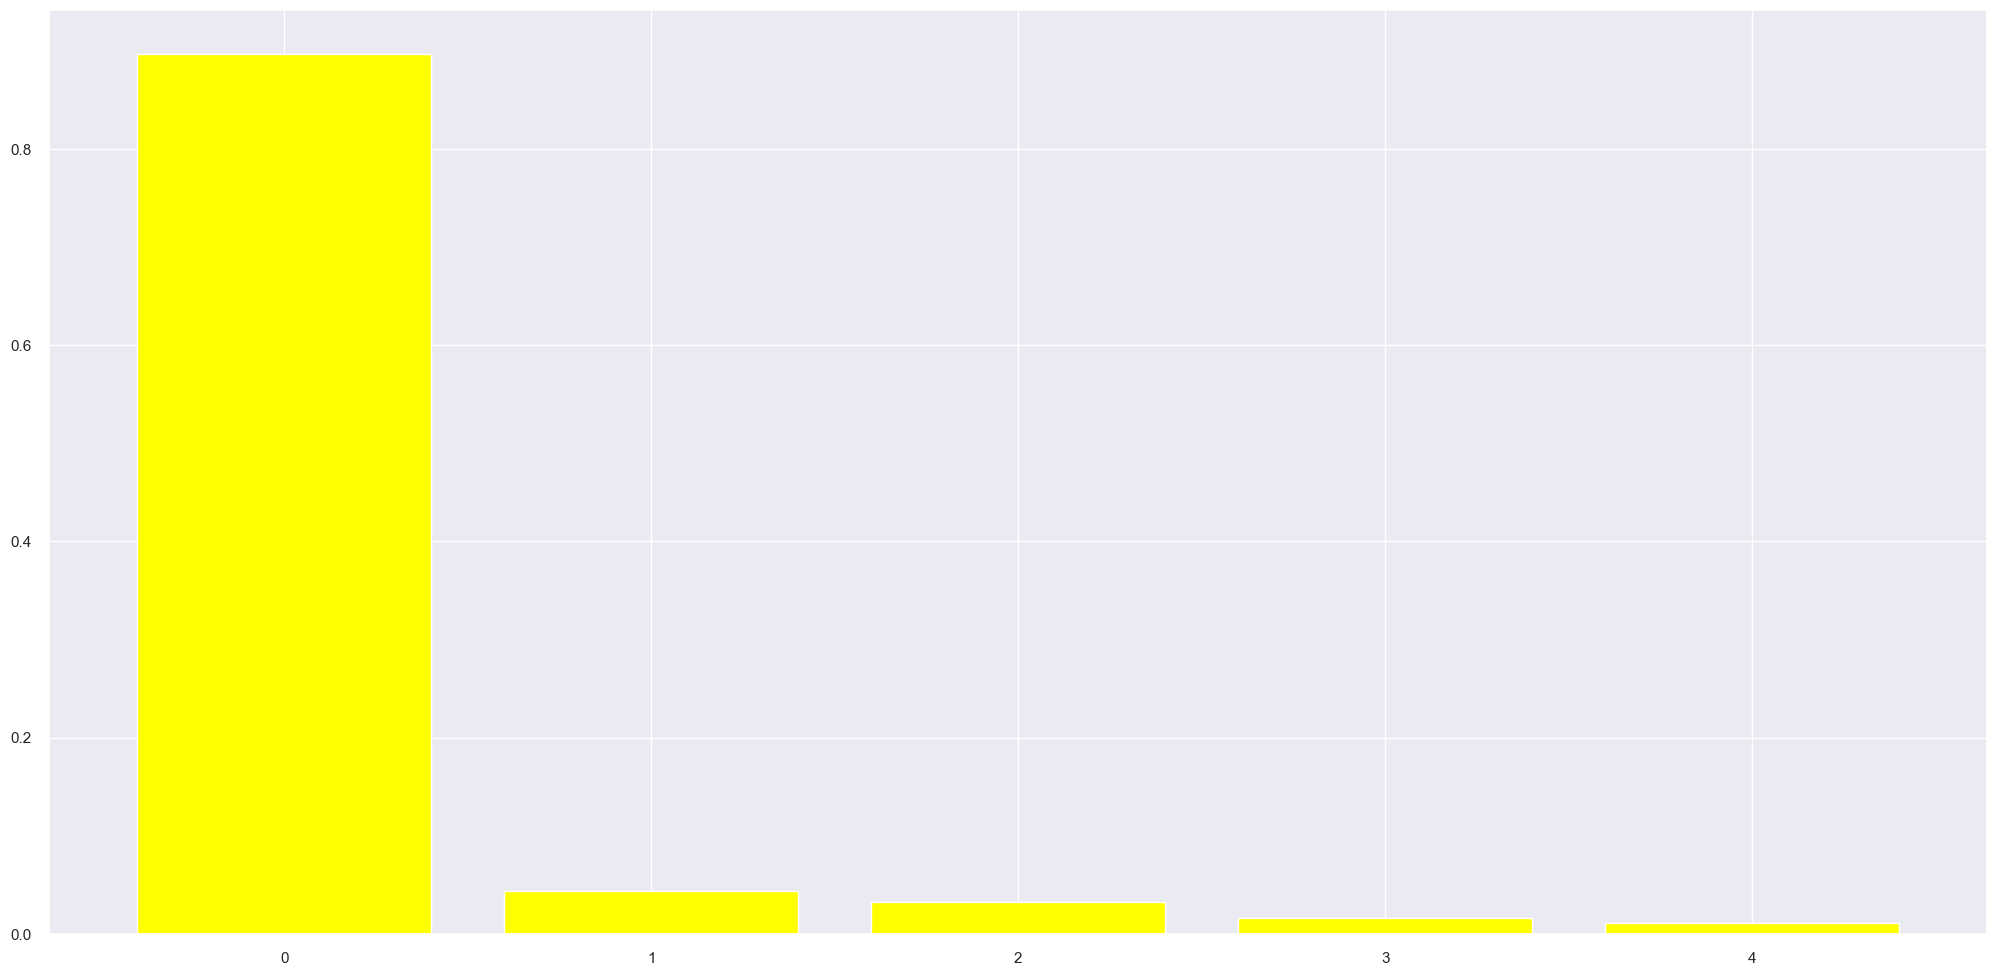

In [75]:
pca = dcp.PCA(n_components = X.shape[1])
principal_component = pca.fit_transform(X)


#pcs componentes
df_pca = pd.DataFrame(principal_component)

# plot explained variable
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_,color='yellow');

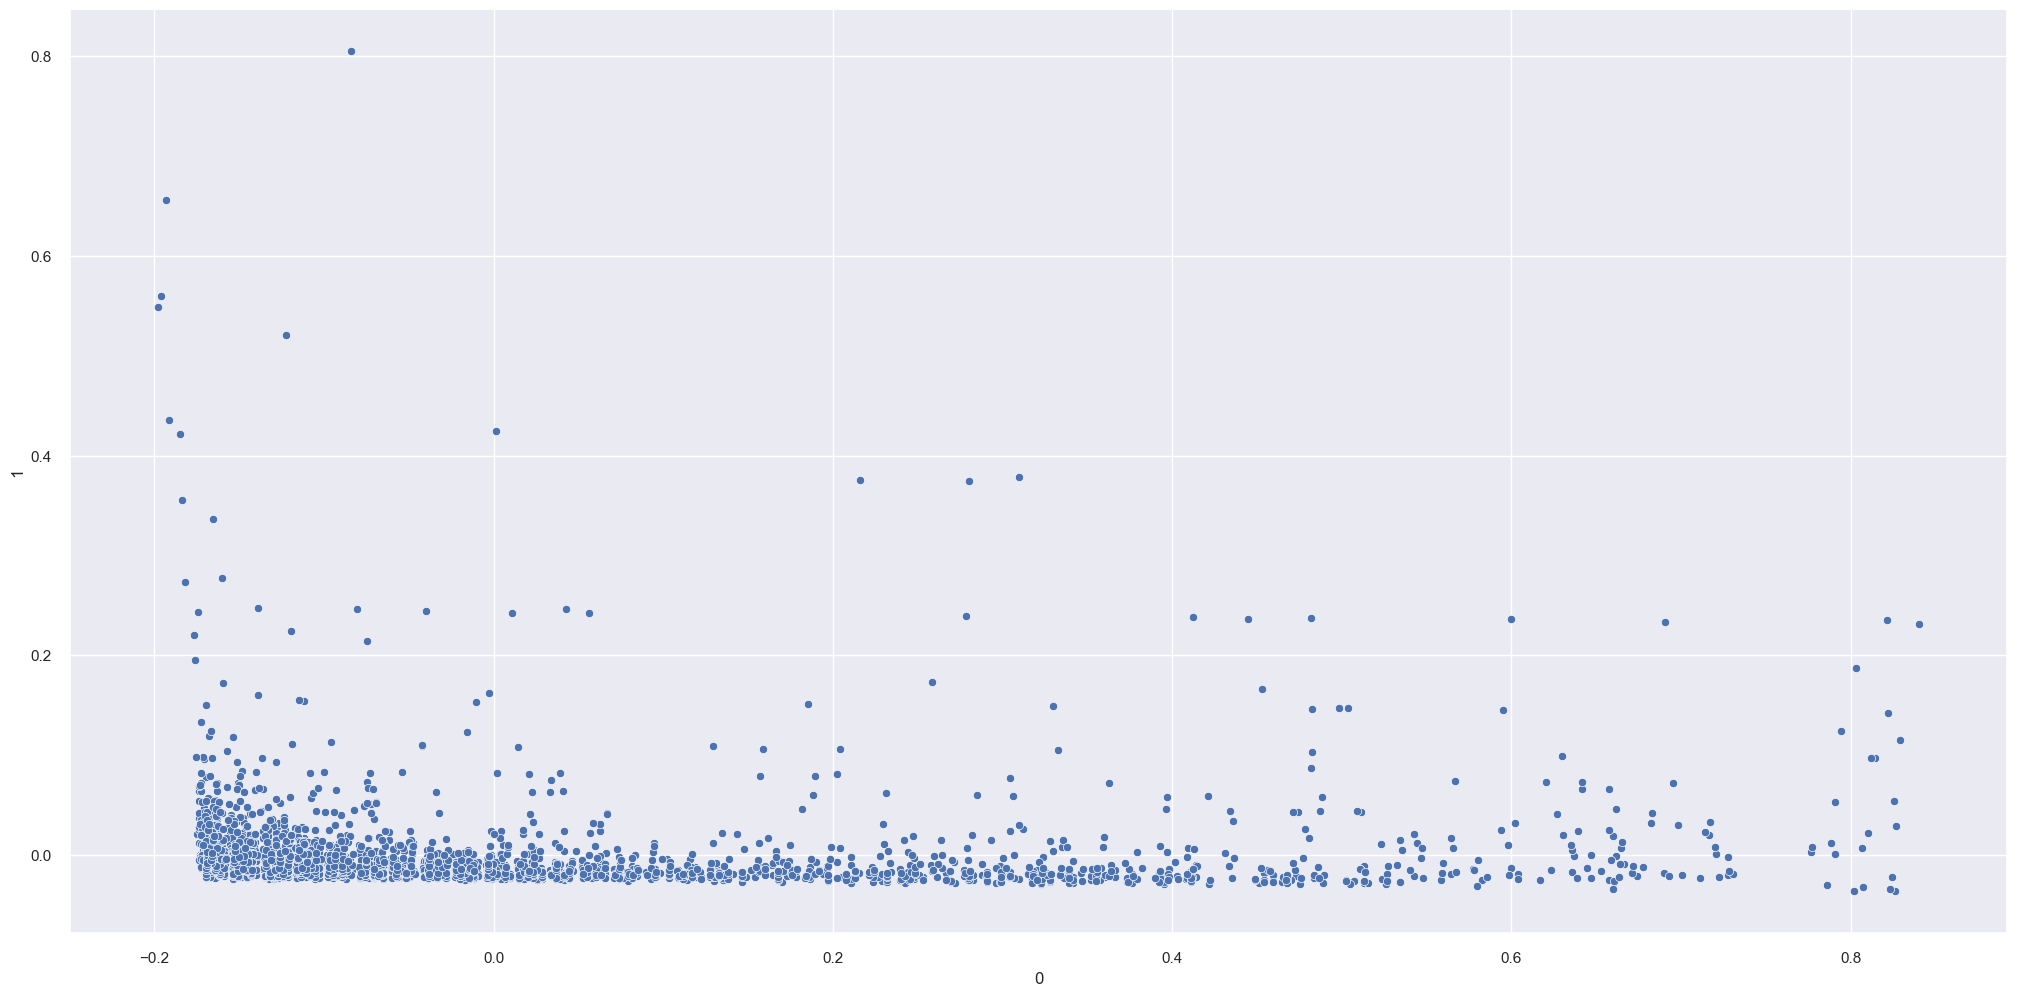

In [76]:
sns.scatterplot(x=0,y=1,data=df_pca);

### UMAP

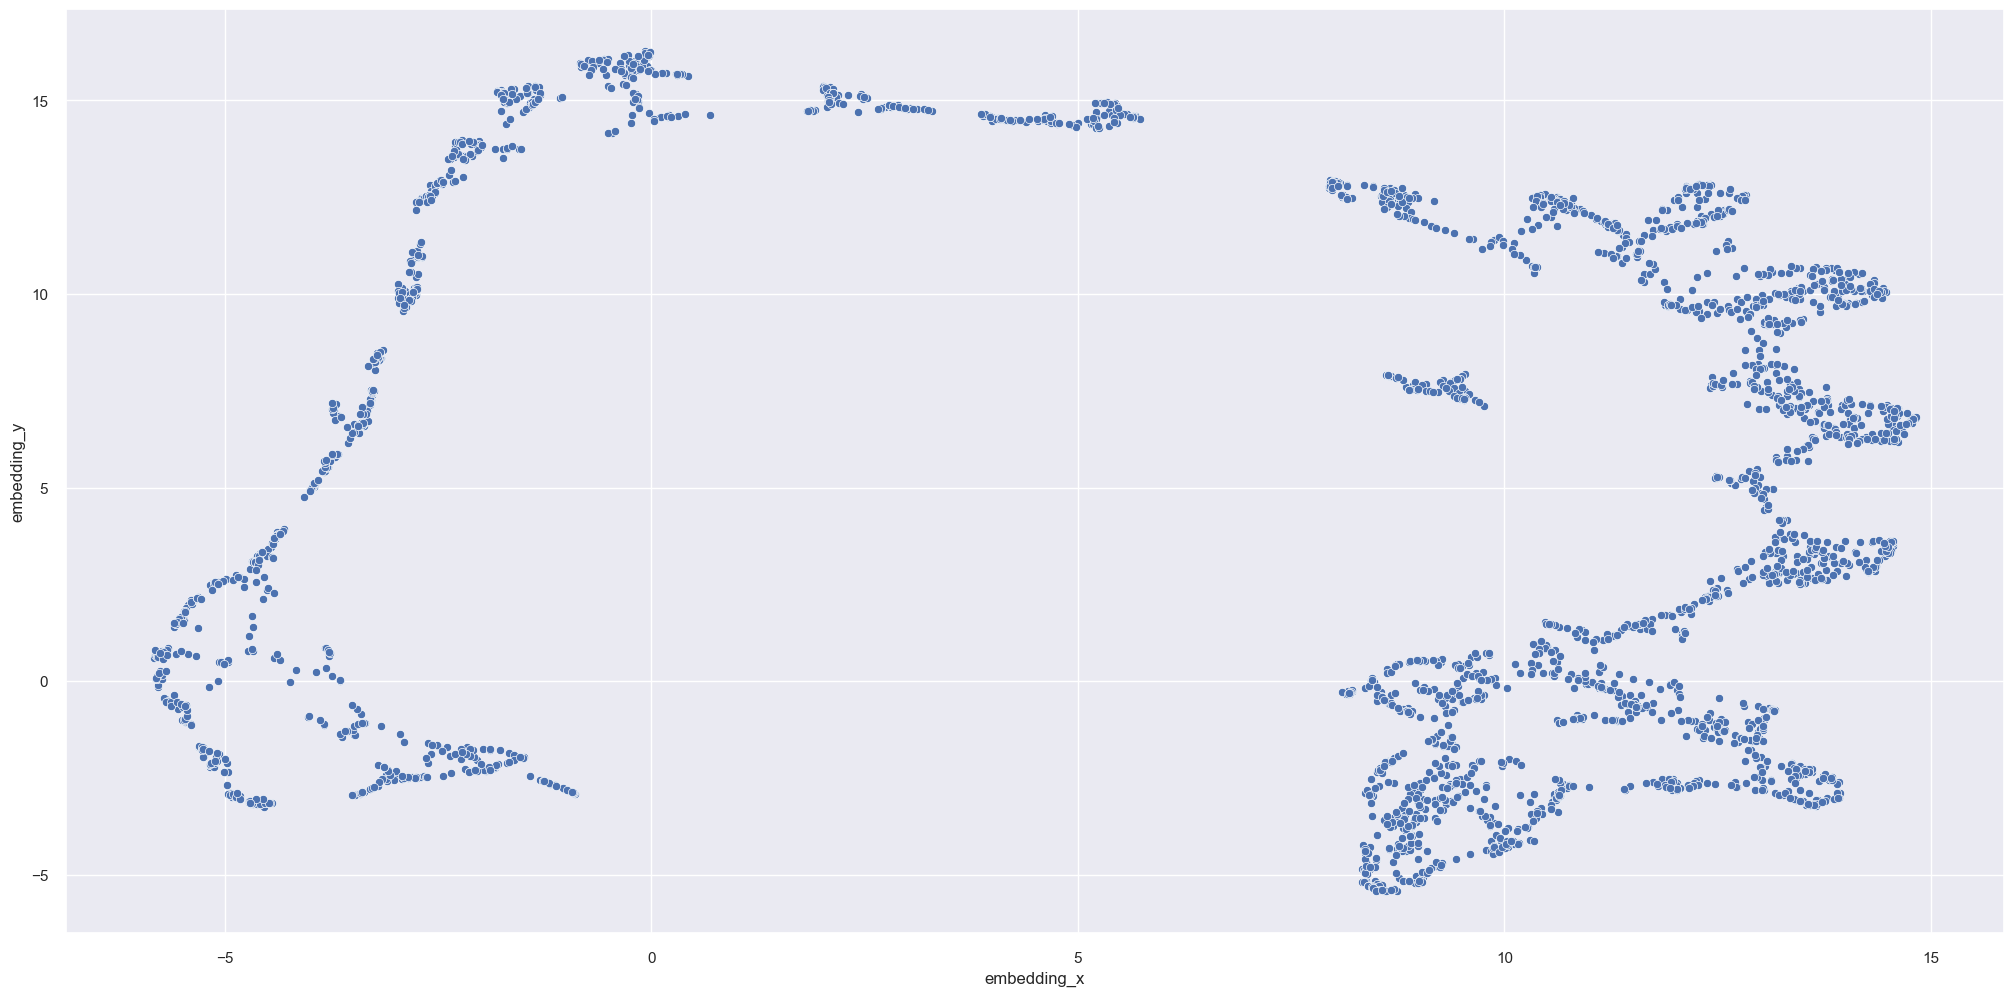

In [77]:
import umap.umap_ as umap
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)


#embedding

df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]


sns.scatterplot(x='embedding_x', y ='embedding_y',data=df_pca);

### t-sne

In [78]:
from sklearn.manifold import TSNE

C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


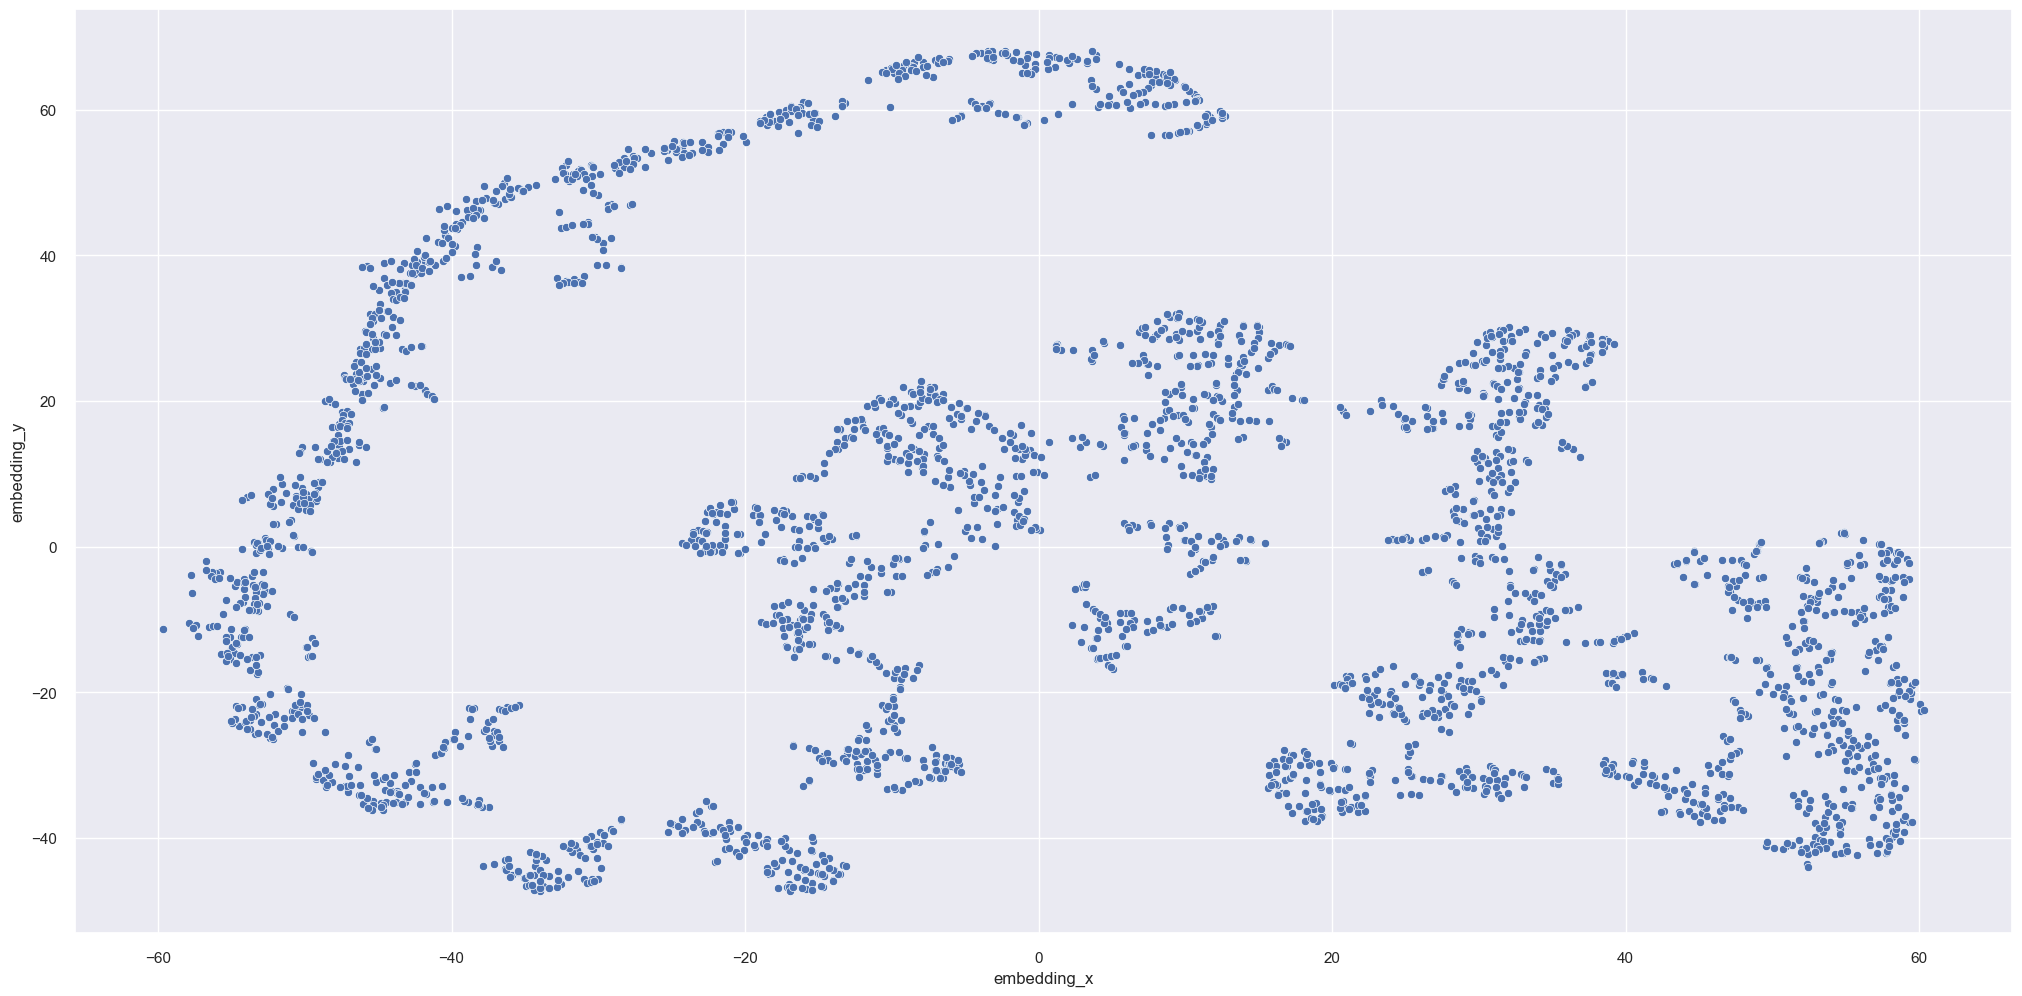

In [79]:
reducer = TSNE(n_components=2,n_jobs=-1,random_state=42)
embedding = reducer.fit_transform(X)


#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]


sns.scatterplot(x='embedding_x', y ='embedding_y',data=df_pca);

### Tree-based embedding

In [80]:
X = df_aux.drop(columns=['gross_revenue'],axis=1)
y = df_aux['gross_revenue']


# model definition
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)

#model training
rf_model.fit(X,y.values)

# Leaf
df_leaf = pd.DataFrame(rf_model.apply(X))
#dataframe Leaf

In [493]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3588,3365,3590,3623,3644,3695,3647,3506,3739,3463,...,3386,3405,3527,3651,3482,3488,3556,3512,3603,3637
1,3402,3284,3294,3089,3039,3387,3267,3359,3335,3257,...,3283,3267,2971,2955,3388,3119,3295,3215,3029,3537
2,3359,3469,3341,3505,3550,3573,3283,3582,3375,3272,...,3333,3347,3329,3432,3552,3595,3429,3264,3489,3441
3,1240,797,1016,384,731,1671,547,884,1775,1085,...,810,1240,721,579,1178,1264,890,1045,998,907
4,479,552,1752,902,868,891,1321,582,750,623,...,392,1449,887,846,780,632,641,525,1624,539


In [82]:
import umap.umap_ as umap

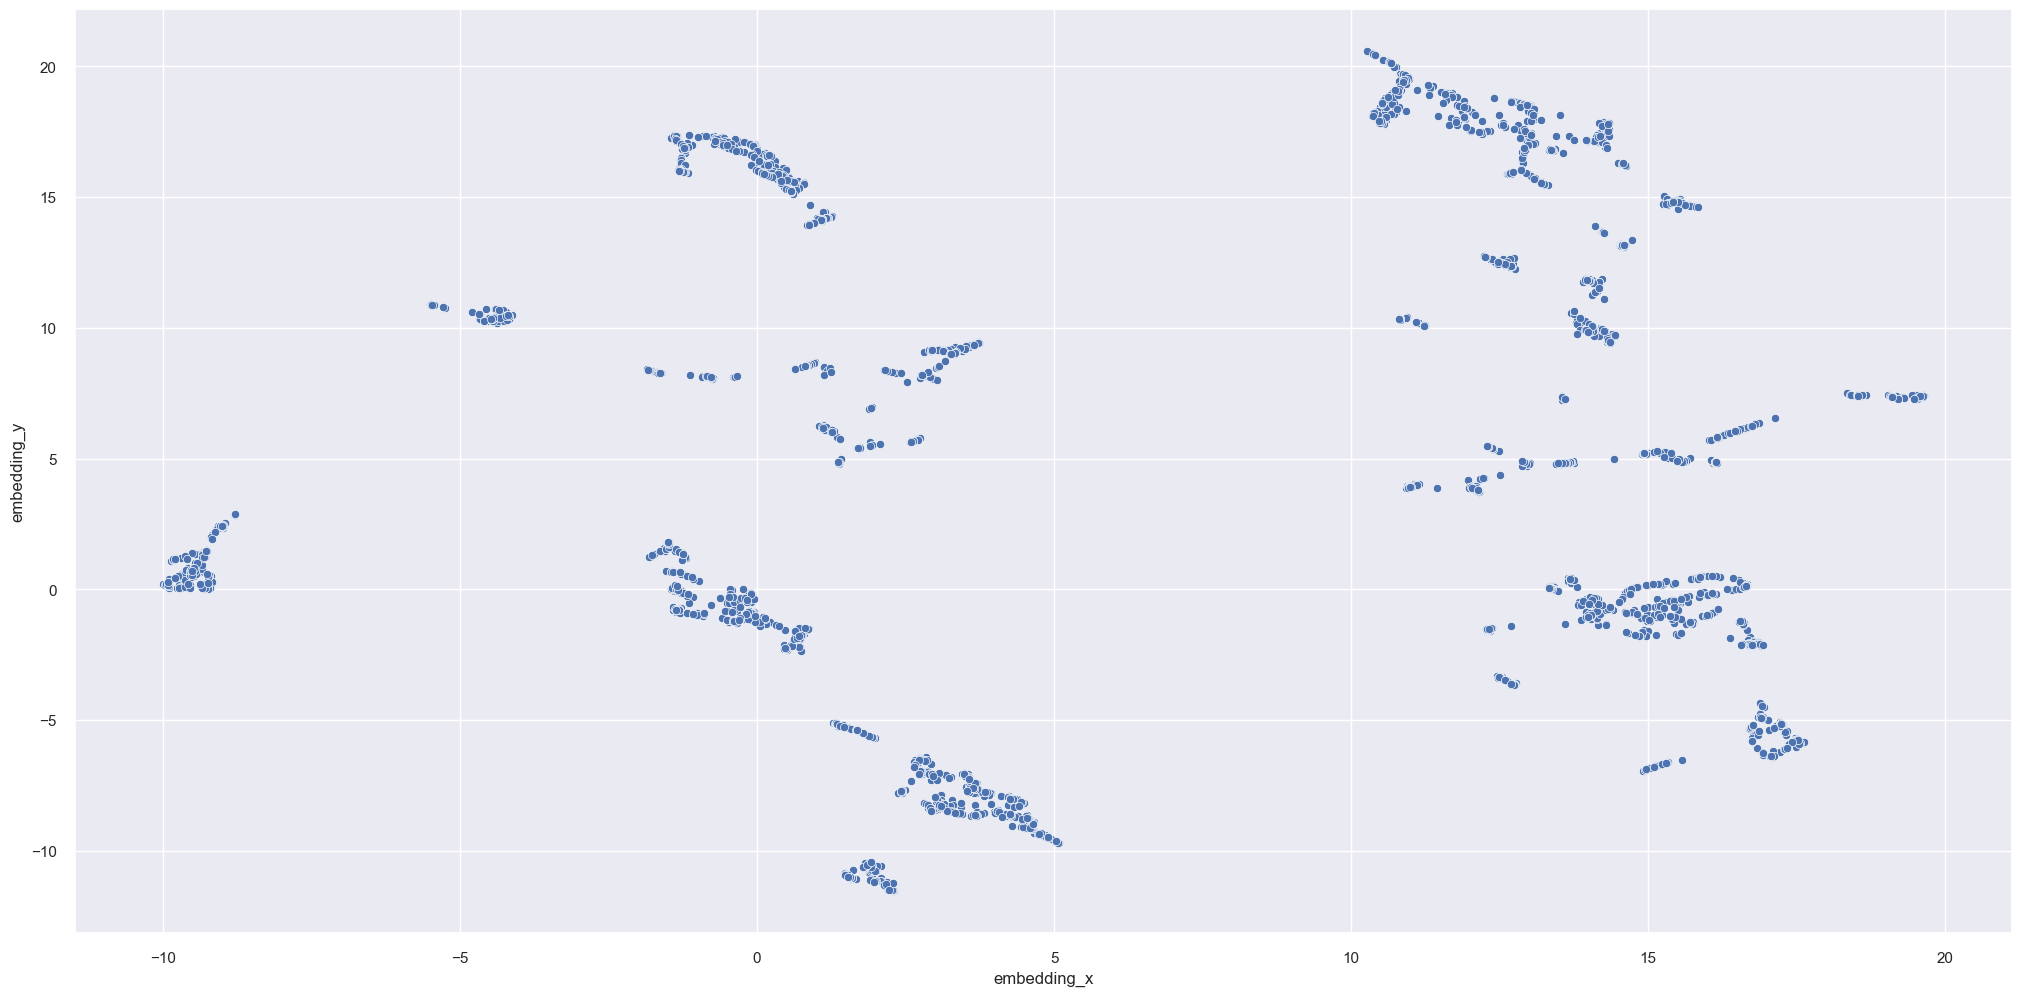

In [83]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)


#embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:,0]
df_tree['embedding_y'] = embedding[:,1]


sns.scatterplot(x='embedding_x', y ='embedding_y',data=df_tree);

# Data preparation

Distribuição normal e não possui outlier - stardart scaler

distribuição normal e possui outilier - robust scaler

não distribuição normal - Min max Scaler


**Teste de normalidade**

**QQ plot** - Quantile Quantile Plot ( Quatile teorica x Quatile real)

**KS Teste** - Kolgomorov Smirnoff ( Teste de Hipótese ) se P-valor > 0.5 Distribuição normal, P-valor < 0.5 - Não distribuição normal

In [84]:
df6 = df5.copy()

In [85]:
df6.head()

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
0,17850.0,5391.21,372.0,34.0,1733.0,297.0,50.970588,8.735294,0.486111,18.152222,35.500000,21.0
1,13047.0,3232.59,56.0,9.0,1390.0,171.0,154.444444,19.000000,0.048780,18.904035,27.250000,6.0
2,12583.0,6705.38,2.0,15.0,5028.0,232.0,335.200000,15.466667,0.045699,28.902500,23.187500,50.0
3,13748.0,948.25,95.0,5.0,439.0,28.0,87.800000,5.600000,0.017921,33.866071,92.666667,0.0
4,15100.0,876.00,333.0,3.0,80.0,3.0,26.666667,1.000000,0.136364,292.000000,8.600000,22.0


In [86]:
mm = MinMaxScaler()
#ss = StandardScaler()
#rs = RobustScaler()

df6['gross_revenue'] = mm.fit_transform(df6[['gross_revenue']])
df6['recency_days'] = mm.fit_transform(df6[['recency_days']])
df6['qtde_invoice'] = mm.fit_transform(df6[['qtde_invoice']])
df6['qtde_items'] = mm.fit_transform(df6[['qtde_items']])
df6['qtde_products'] = mm.fit_transform(df6[['qtde_products']])
df6['avg_basket_size'] = mm.fit_transform(df6[['avg_basket_size']])
df6['avg_unique_basket_size'] = mm.fit_transform(df6[['avg_unique_basket_size']])
df6['freq'] = mm.fit_transform(df6[['freq']])
df6['avg_rec_days'] = mm.fit_transform(df6[['avg_rec_days']])
df6['qtde_returns'] = mm.fit_transform(df6[['qtde_returns']])
df6['avg_ticket'] = mm.fit_transform(df6[['avg_ticket']])


In [87]:
df6.head()

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
0,17850.0,0.019292,0.997319,0.160976,0.008799,0.037774,0.008317,0.025896,0.160512,0.003595,0.094521,0.002330
1,13047.0,0.011559,0.150134,0.039024,0.007056,0.021695,0.025539,0.060260,0.014470,0.003764,0.071918,0.000666
2,12583.0,0.024000,0.005362,0.068293,0.025538,0.029479,0.055623,0.048431,0.013441,0.006010,0.060788,0.005547
3,13748.0,0.003375,0.254692,0.019512,0.002225,0.003446,0.014447,0.015400,0.004165,0.007125,0.251142,0.000000
4,15100.0,0.003116,0.892761,0.009756,0.000401,0.000255,0.004272,0.000000,0.043717,0.065116,0.020822,0.002441


# Feature selection

In [88]:
df7 = df6.copy()

In [89]:
cols_select = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'freq', 'qtde_returns']

In [90]:
df7 = df7[cols_select]

# Fine tunning

In [91]:
#X = df7.drop(columns='customer_id')
X = df_tree

In [92]:
X.head()

,embedding_x,embedding_y
0,12.976369,18.504473
1,12.428540,12.565516
2,14.296907,17.756611
3,-9.786930,1.187126
4,1.730409,5.397947


In [93]:
#clusters = [2,3,4,5,6,7]
clusters = np.arange(2,31,1)

## K-means

In [94]:
sil_k = []
for k in clusters:
    # model definition
    k_model = c.KMeans(n_clusters=k)

    #model training
    k_model.fit(X)

    #model predict
    labels = k_model.predict(X)

    #model performace
    sil_k.append(m.silhouette_score(X,labels,metric='euclidean'))

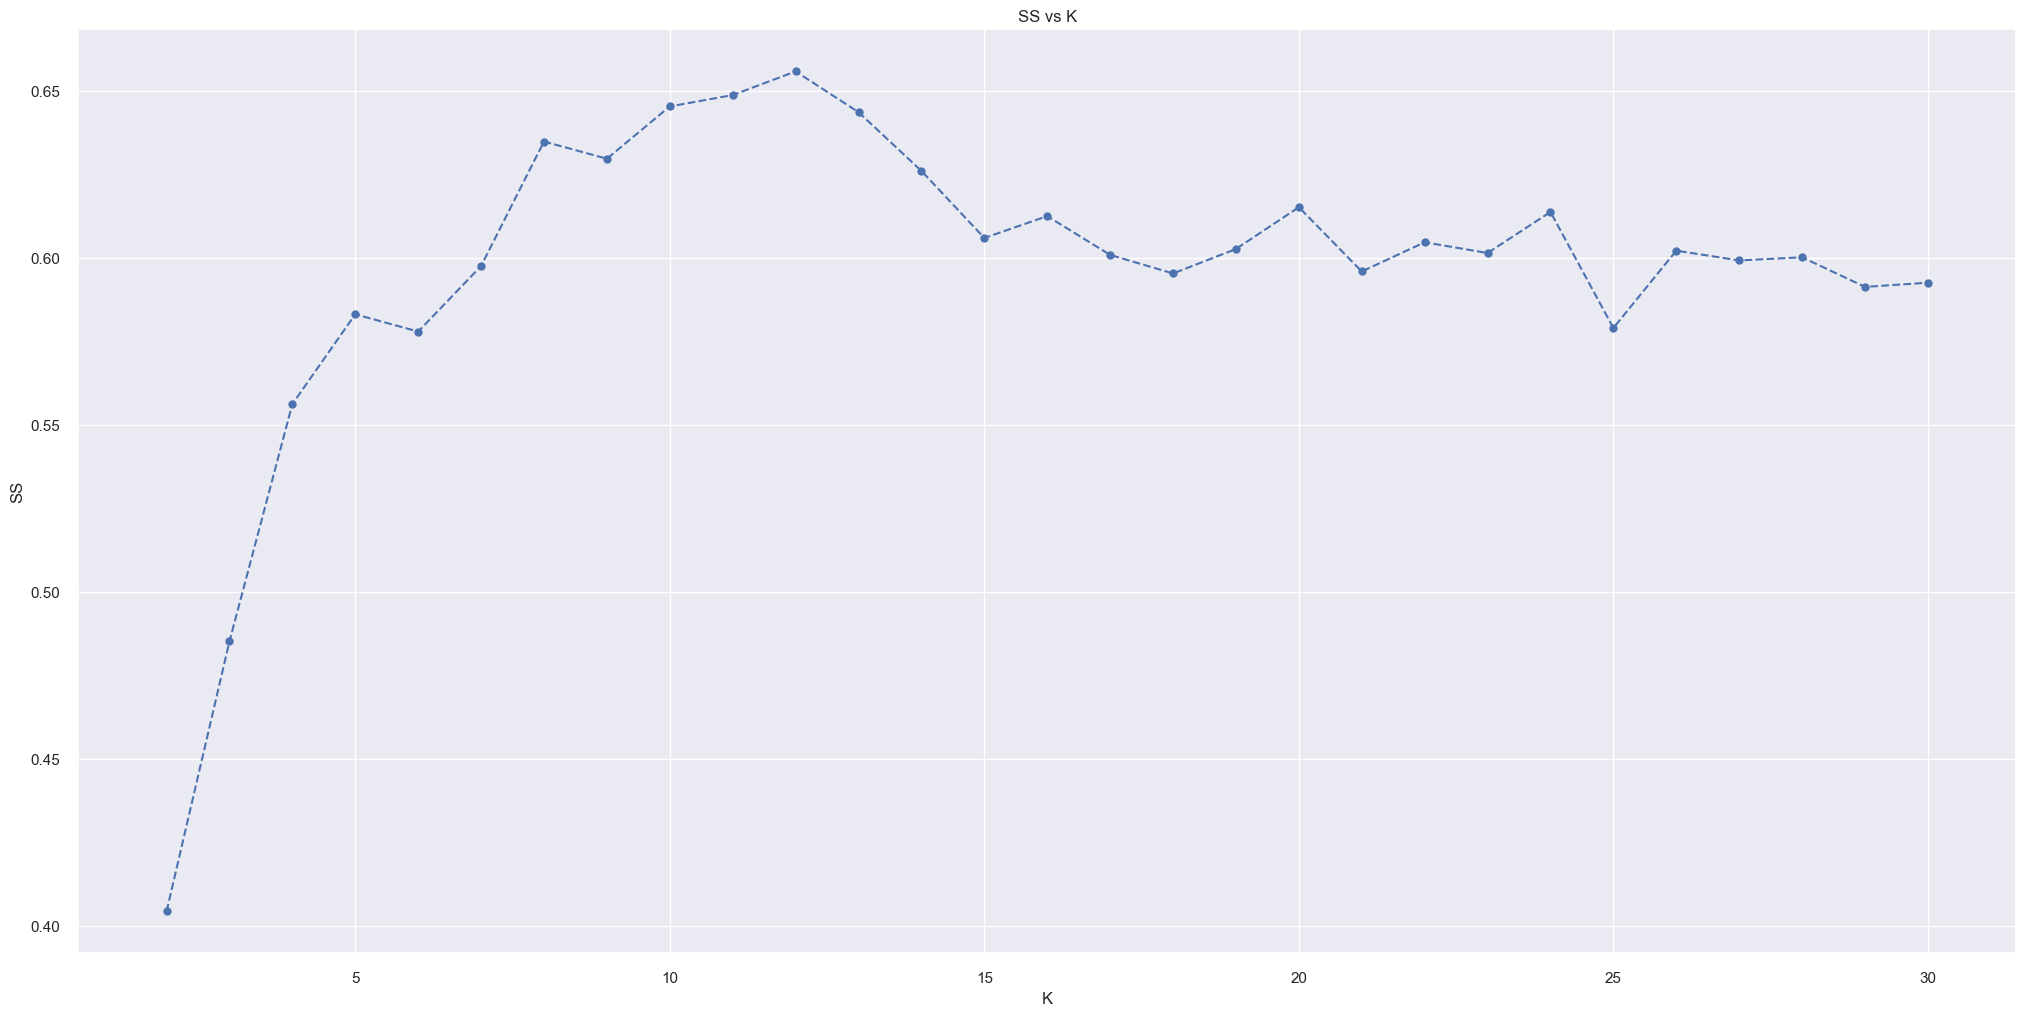

In [95]:
plt.plot(clusters,sil_k,linestyle='--',marker = 'o');
plt.xlabel('K');
plt.ylabel('SS');
plt.title('SS vs K');

## GMM

In [96]:
from sklearn import  mixture as mx

AIC - ajuste do modelo

BIC - ajuste dos parametros

In [97]:
gmm_k = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture(n_components=k)

    #model training
    gmm_model.fit(X)

    #model predict
    labels = gmm_model.predict(X)

    #model performace
    gmm_k.append(m.silhouette_score(X,labels,metric='euclidean'))

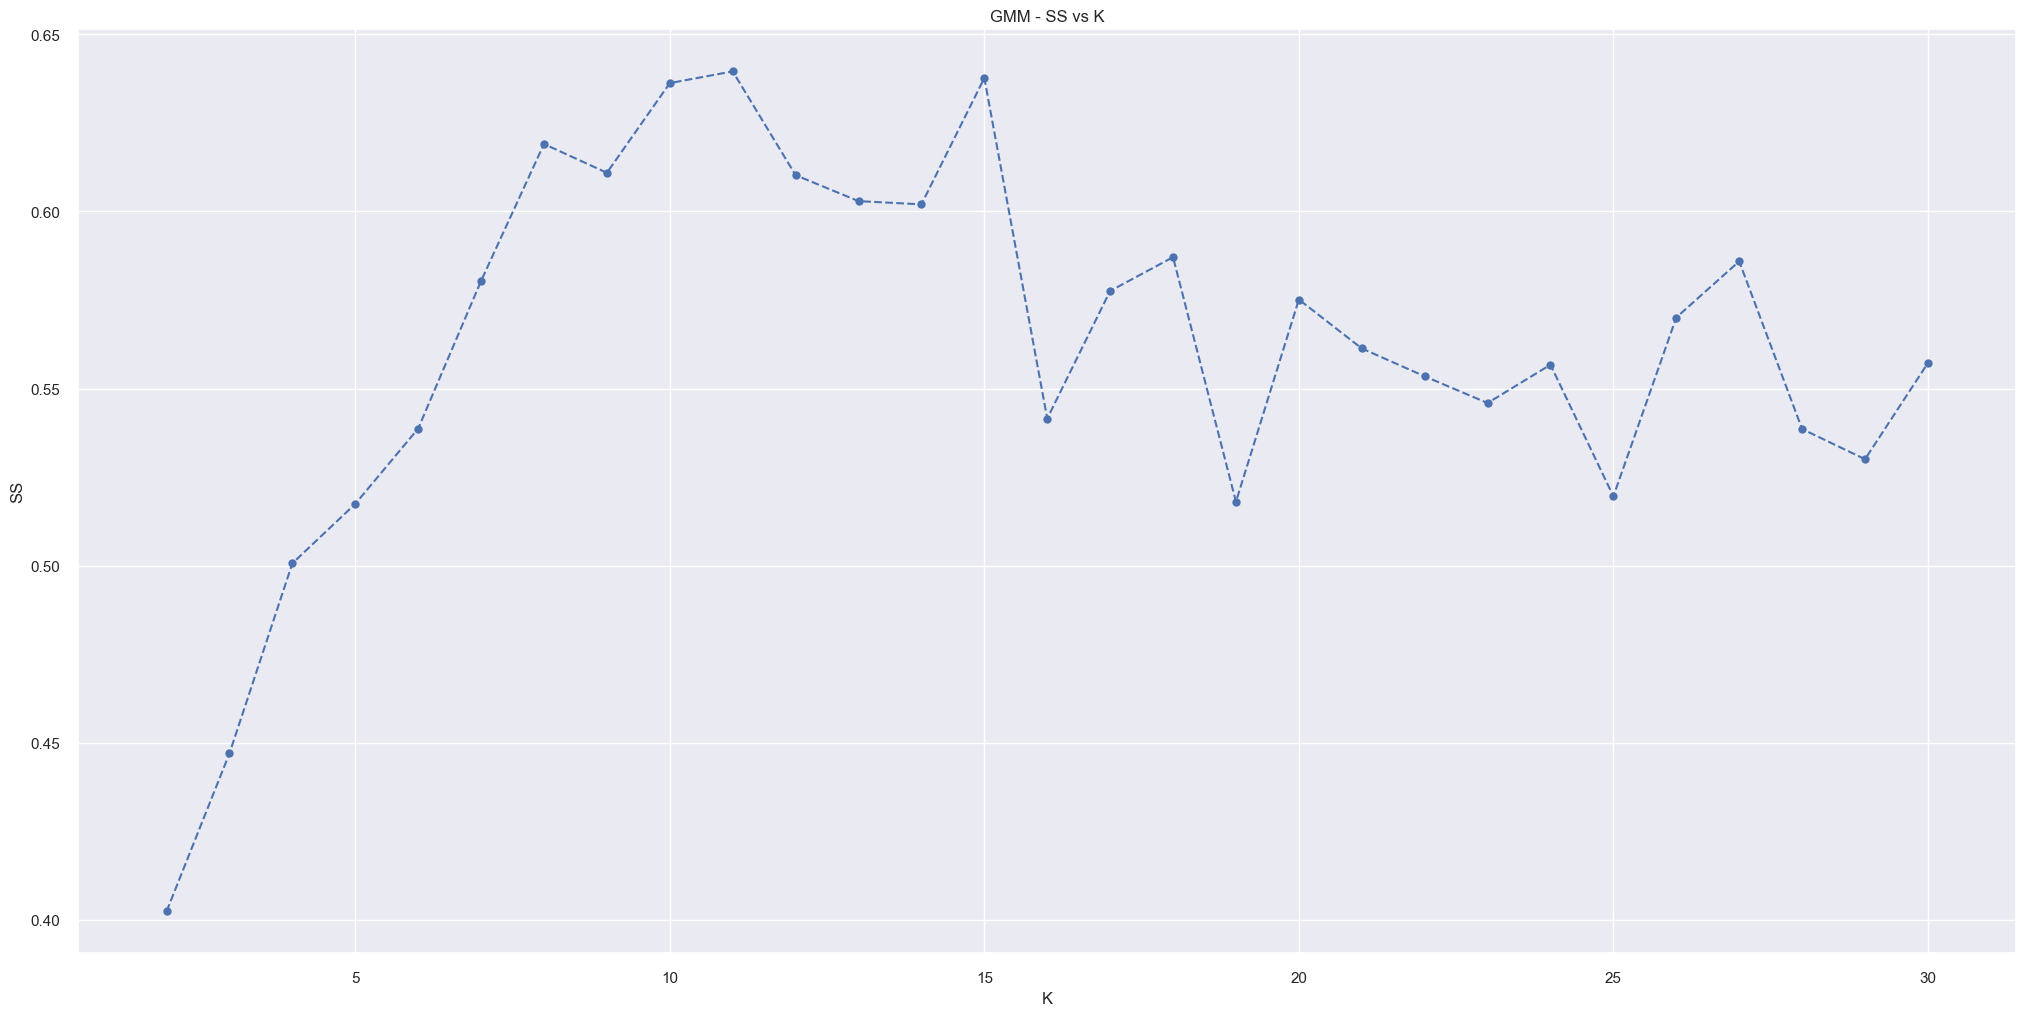

In [98]:
plt.plot(clusters,gmm_k,linestyle='--',marker = 'o');
plt.xlabel('K');
plt.ylabel('SS');
plt.title('GMM - SS vs K');

## H-Clustering

In [99]:
from scipy.cluster import hierarchy as hr

In [100]:
hc_model = hr.linkage(X,'ward')

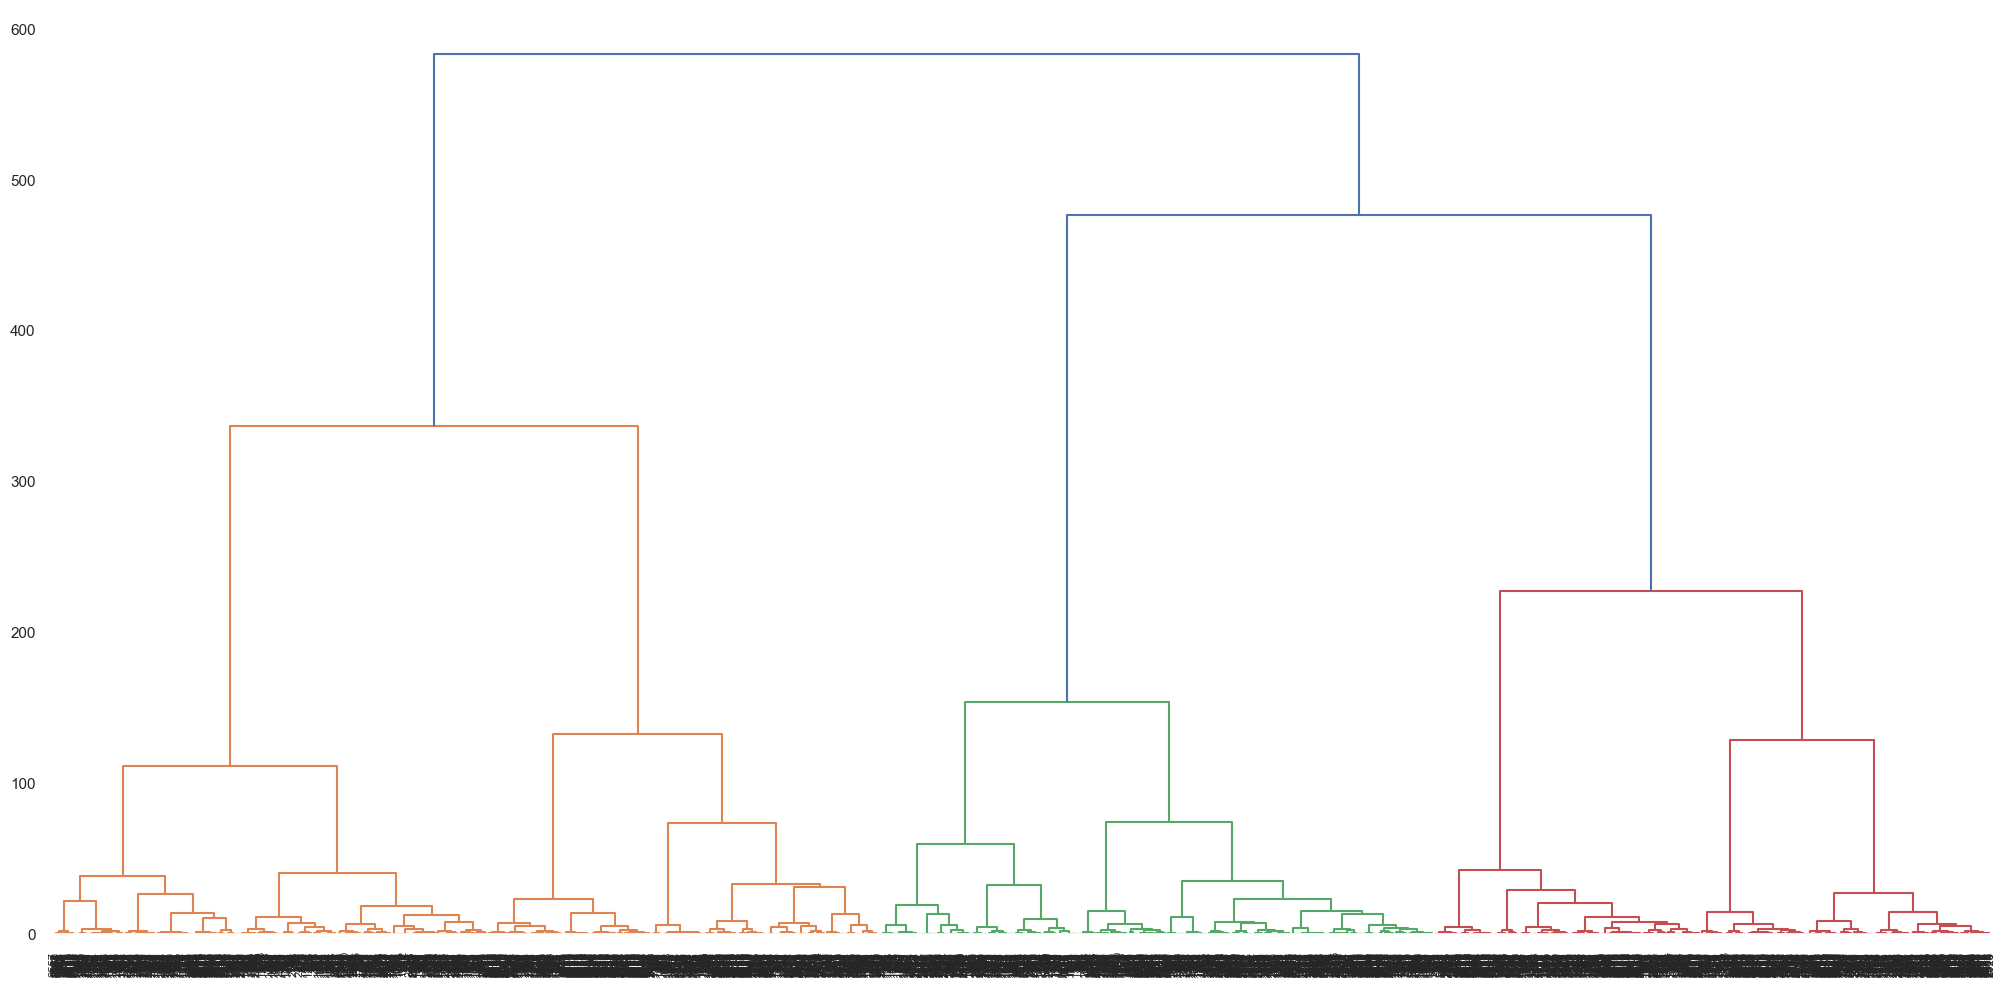

In [101]:
hr.dendrogram(hc_model,
             leaf_rotation=90,
             leaf_font_size=8)
plt.plot();

[]

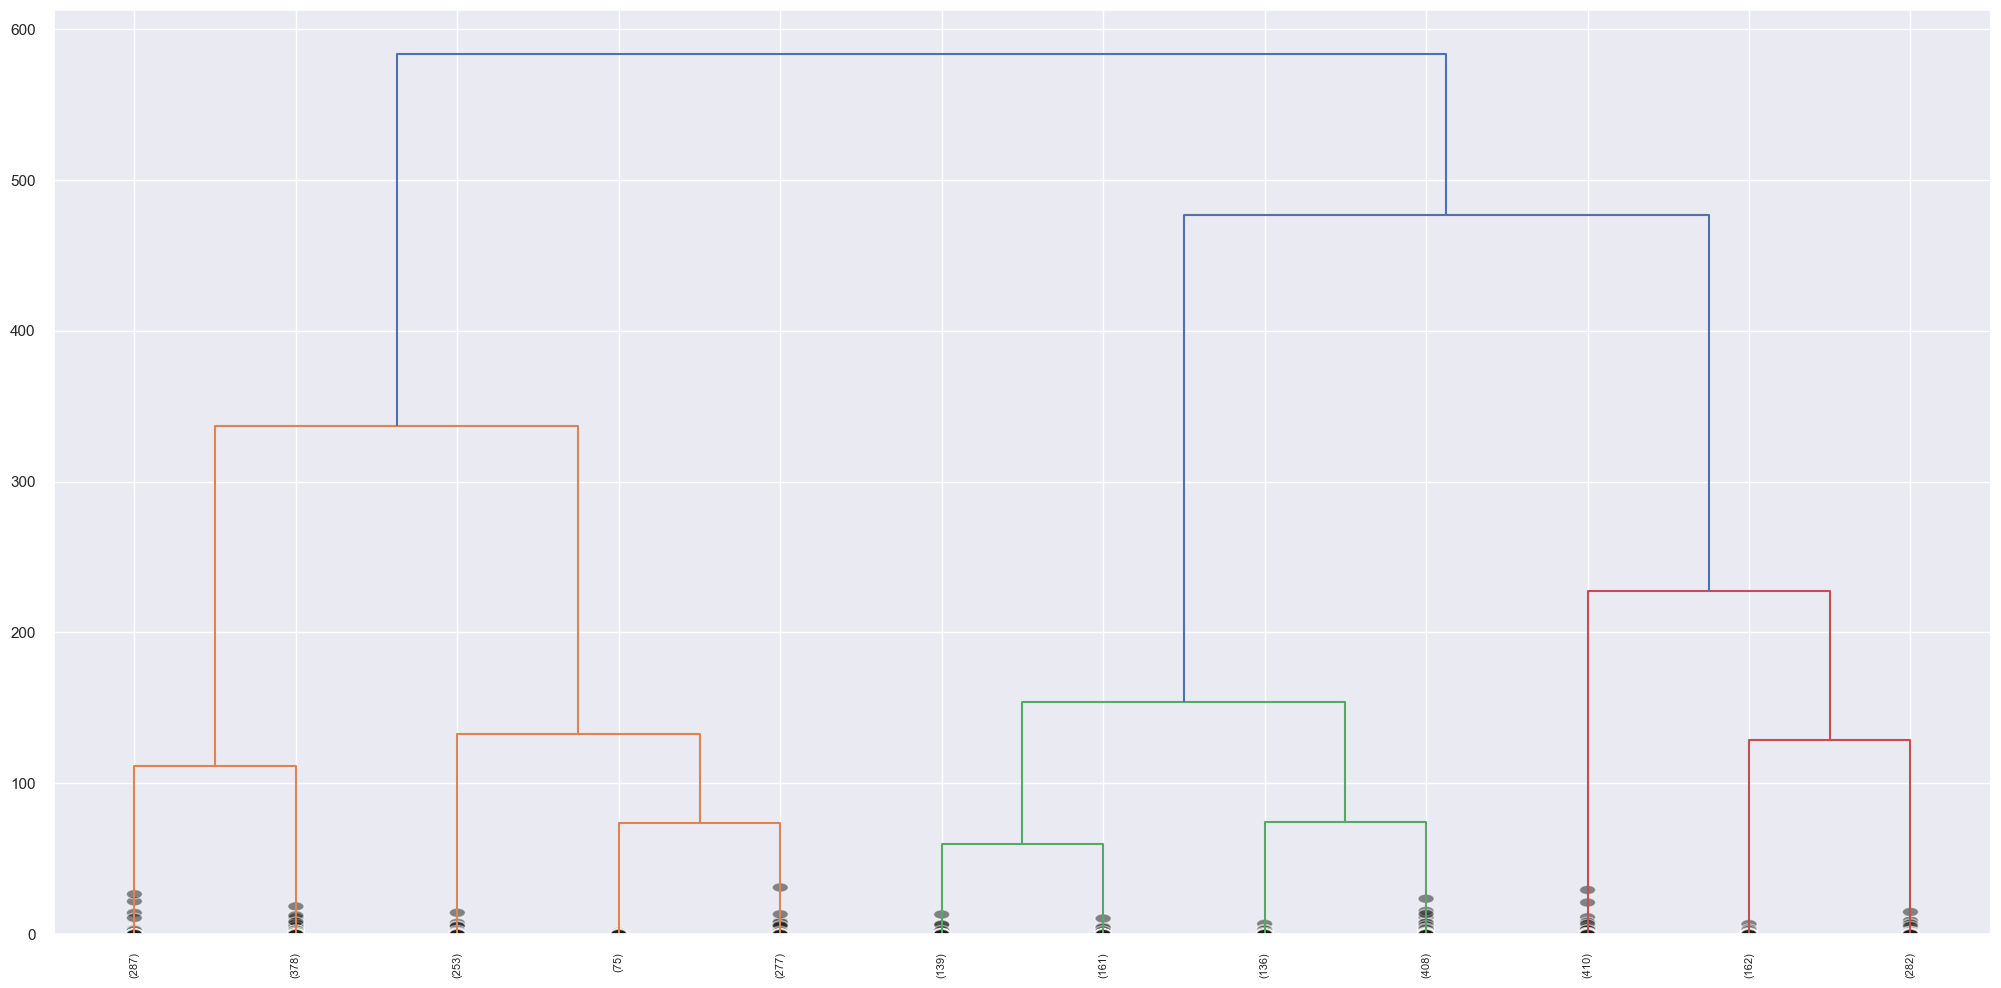

In [102]:
hr.dendrogram(hc_model,
              truncate_mode='lastp',
              p=12,
              leaf_rotation=90,
              leaf_font_size=8,
             show_contracted=True)
plt.plot()

In [103]:
hc_k = []
for k in clusters:
    # model definition
    hc_model = hr.linkage(X,'ward')

    #model predict
    labels = hr.fcluster(hc_model,k,criterion='maxclust')

    #model performace
    hc_k.append(m.silhouette_score(X,labels,metric='euclidean'))

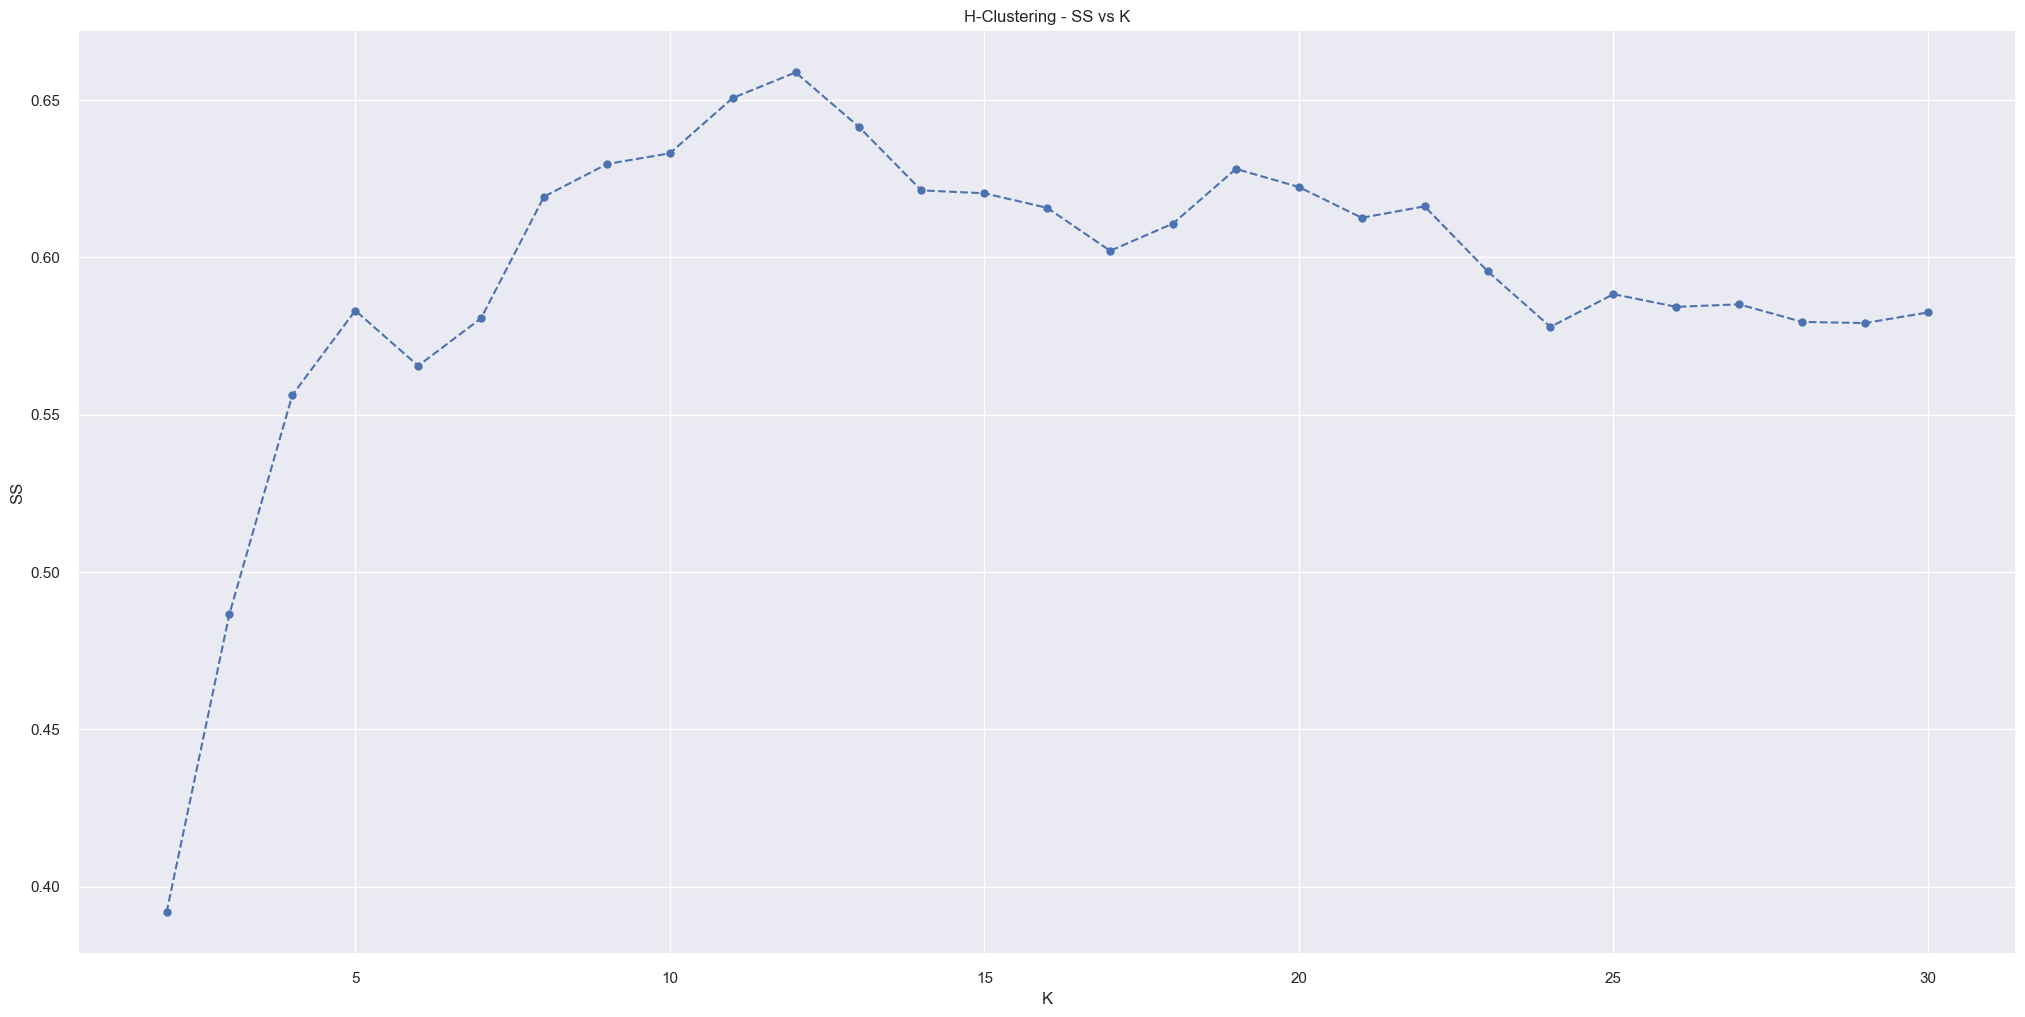

In [104]:
plt.plot(clusters,hc_k,linestyle='--',marker = 'o');
plt.xlabel('K');
plt.ylabel('SS');
plt.title('H-Clustering - SS vs K');

## DBSCAN

In [105]:
eps=0.2
min_samples = 20
#model training e predict
dbscan_model = c.DBSCAN(eps=eps,min_samples=min_samples)

#model training e predict
labels = dbscan_model.fit_predict(X)

db_k = m.silhouette_score(X,labels,metric='euclidean')

In [106]:
from sklearn.neighbors import NearestNeighbors

In [107]:
nei = NearestNeighbors(n_neighbors=min_samples).fit(X)
dist, indi = nei.kneighbors(X)

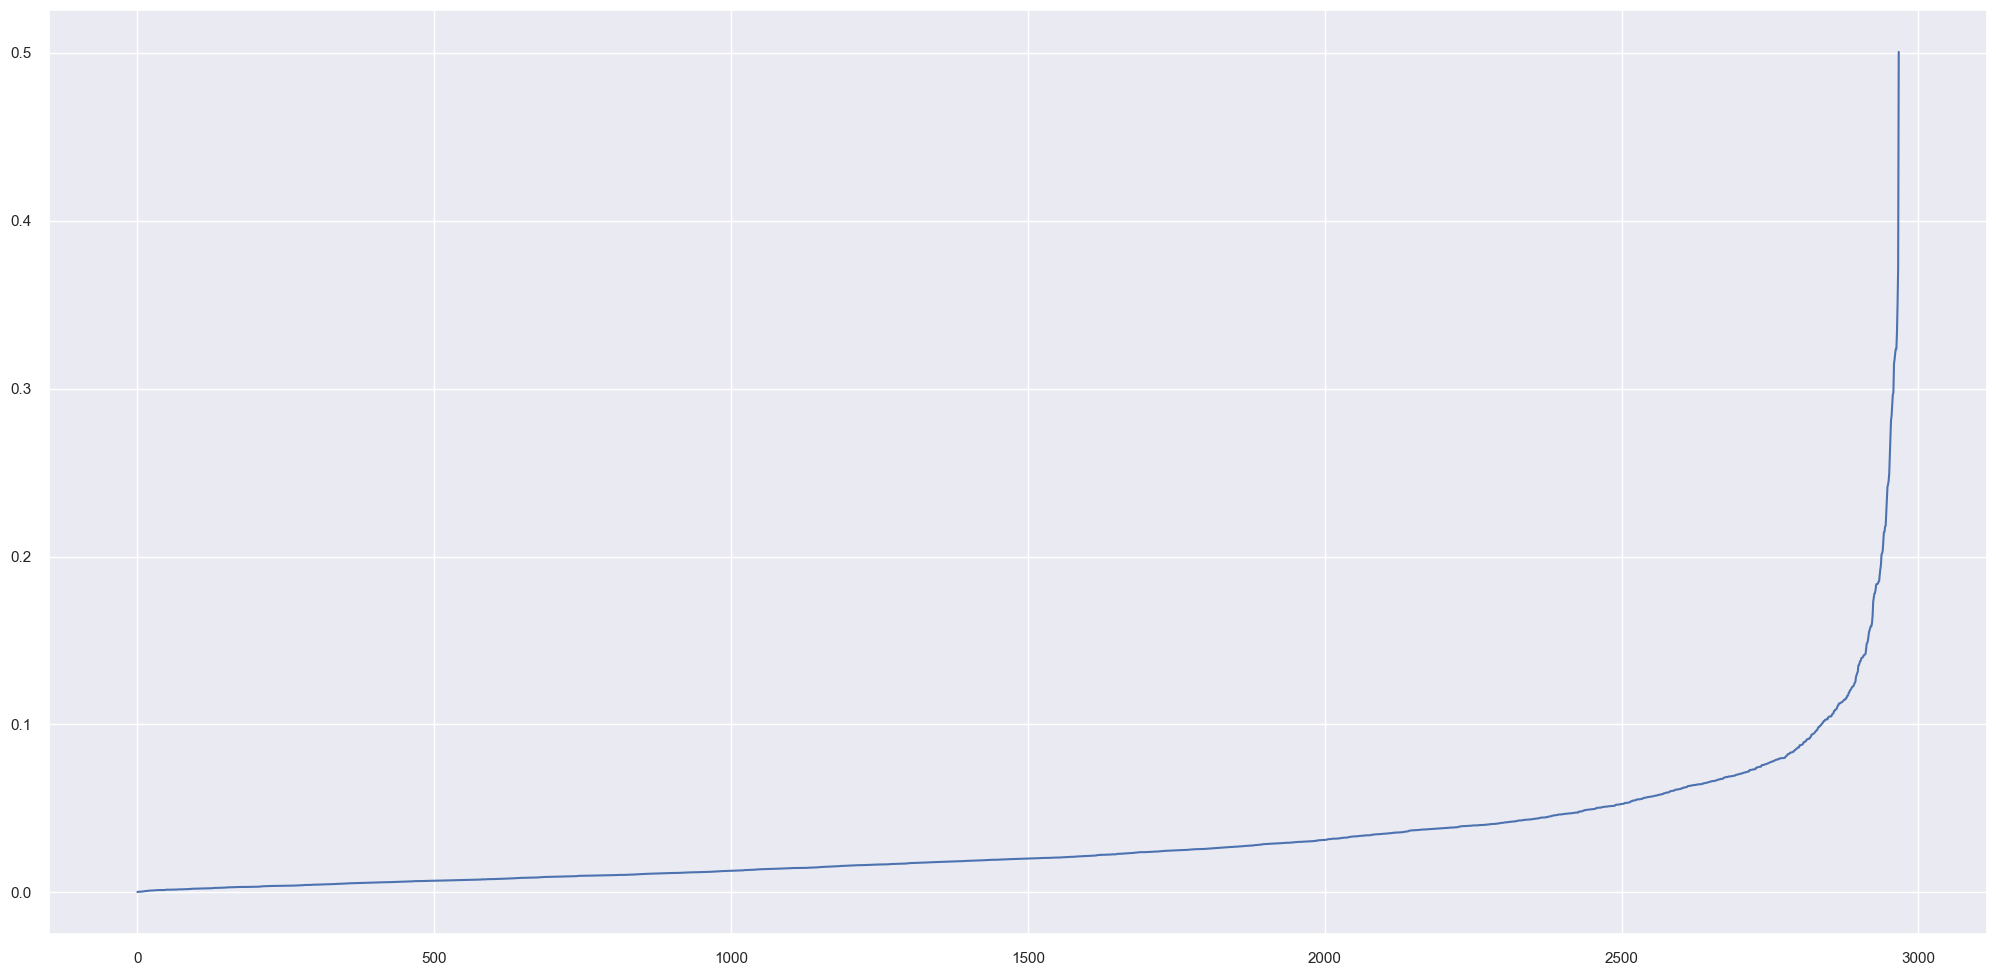

In [108]:
dist = np.sort(dist,axis=0)
dist = dist[:,1]
plt.plot(dist);

In [109]:
db_k = [db_k,0.00,0.00,0.00,0.00,0.00]

In [110]:
db_k

[0.08682703, 0.0, 0.0, 0.0, 0.0, 0.0]

## Results

In [111]:
# Model name | k=2 | k=3 | k=4 | k=5
# Kmeans        ss    ss    ss    ss
# GMM           ss    ss    ss    ss
# HC            ss    ss    ss    ss
# DBSCAN        ss    ss    ss    ss

df_results = pd.DataFrame({
    'Kmeans': sil_k,
    'GMM': gmm_k,
    'HC': hc_k,
}).T
df_results.columns = clusters
df_results.style.highlight_max(color='lightgreen',axis=1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Kmeans,0.404371,0.485202,0.556251,0.583122,0.577949,0.597572,0.634844,0.629694,0.645347,0.648753,0.655840,0.643626,0.626051,0.605964,0.612511,0.600899,0.595344,0.602674,0.615180,0.595939,0.604681,0.601473,0.613752,0.579020,0.602176,0.599245,0.600185,0.591322,0.592578
GMM,0.402441,0.447025,0.500671,0.517449,0.538708,0.580387,0.619025,0.610895,0.636210,0.639516,0.610224,0.602900,0.601988,0.637656,0.541532,0.577545,0.587085,0.518061,0.575129,0.561331,0.553449,0.545921,0.556721,0.519585,0.570054,0.585908,0.538583,0.530060,0.557212
HC,0.391801,0.486721,0.556251,0.583122,0.565553,0.580652,0.619319,0.629694,0.633099,0.650689,0.658825,0.641620,0.621319,0.620399,0.615762,0.602108,0.610780,0.628145,0.622394,0.612606,0.616245,0.595614,0.577908,0.588331,0.584296,0.585097,0.579508,0.579143,0.582511


In [112]:
clusters = np.arange(2,11,1)

## Silhouete analisys

For K = 2 Silhouette: 0.3918014466762543
For K = 3 Silhouette: 0.486721396446228
For K = 4 Silhouette: 0.5562514662742615
For K = 5 Silhouette: 0.5831223726272583
For K = 6 Silhouette: 0.5655533075332642
For K = 7 Silhouette: 0.5806516408920288
For K = 8 Silhouette: 0.6193186044692993
For K = 9 Silhouette: 0.6296935081481934
For K = 10 Silhouette: 0.6330989003181458


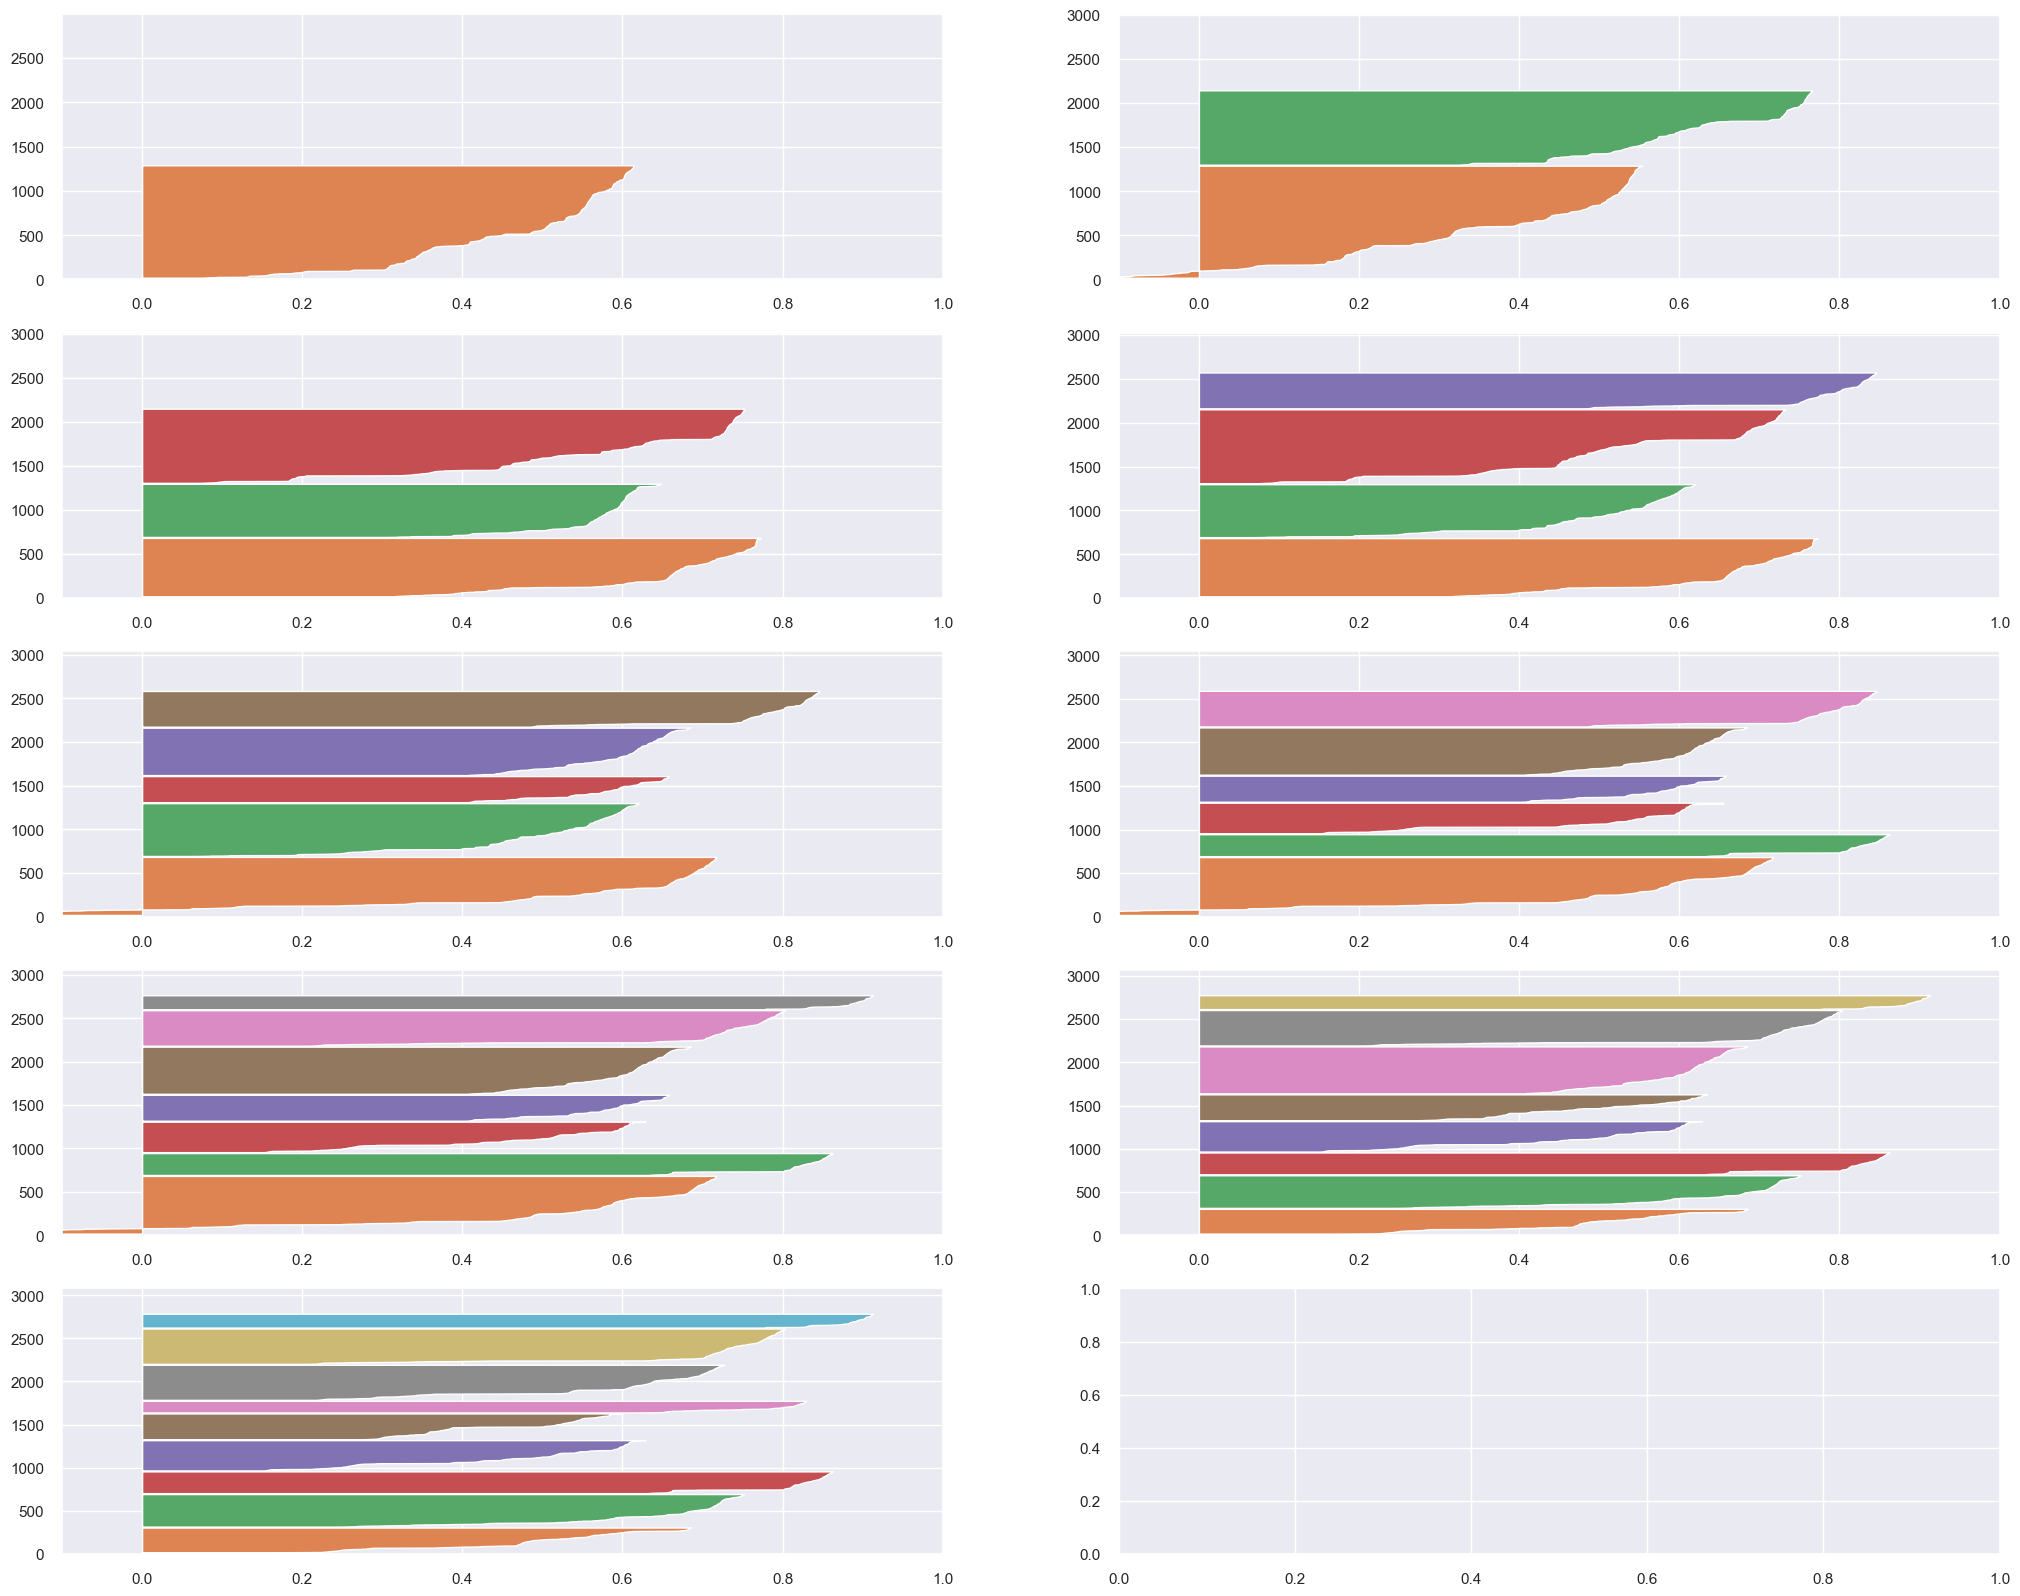

In [113]:
fig,ax = plt.subplots(5,2)
fig.set_size_inches(25,20)

for k in clusters:
    q,mod = divmod(k,2)
    
    ax[q-1,mod].set_xlim([-0.1,1])
    ax[q-1,mod].set_ylim([0,len(X) + (k+1)*10])
    # model definition    
    hc_model = hr.linkage(X,'ward')

    #model predict    
    labels = hr.fcluster(hc_model,k,criterion='maxclust')

    #model performace    
    hc_k = (m.silhouette_score(X,labels,metric='euclidean'))
    print(f'For K = {k} Silhouette: {hc_k}')
    
    ss_values = m.silhouette_samples(X,labels)
    y_lower=10
    for i in range(k):

        ith_ss_values = ss_values[labels==i]
        size_cluster = ith_ss_values.shape[0]
        ith_ss_values = np.sort(ith_ss_values)
        y_upper = y_lower + size_cluster
        ax[q-1,mod].fill_betweenx(np.arange(y_lower,y_upper),0,ith_ss_values)
        y_lower = y_upper+10

For K = 2 Silhouette: 0.404524564743042
For K = 3 Silhouette: 0.44702523946762085
For K = 4 Silhouette: 0.4730849862098694
For K = 5 Silhouette: 0.5005281567573547
For K = 6 Silhouette: 0.5317281484603882
For K = 7 Silhouette: 0.5840573310852051
For K = 8 Silhouette: 0.6190253496170044
For K = 9 Silhouette: 0.6147480010986328
For K = 10 Silhouette: 0.6310362815856934


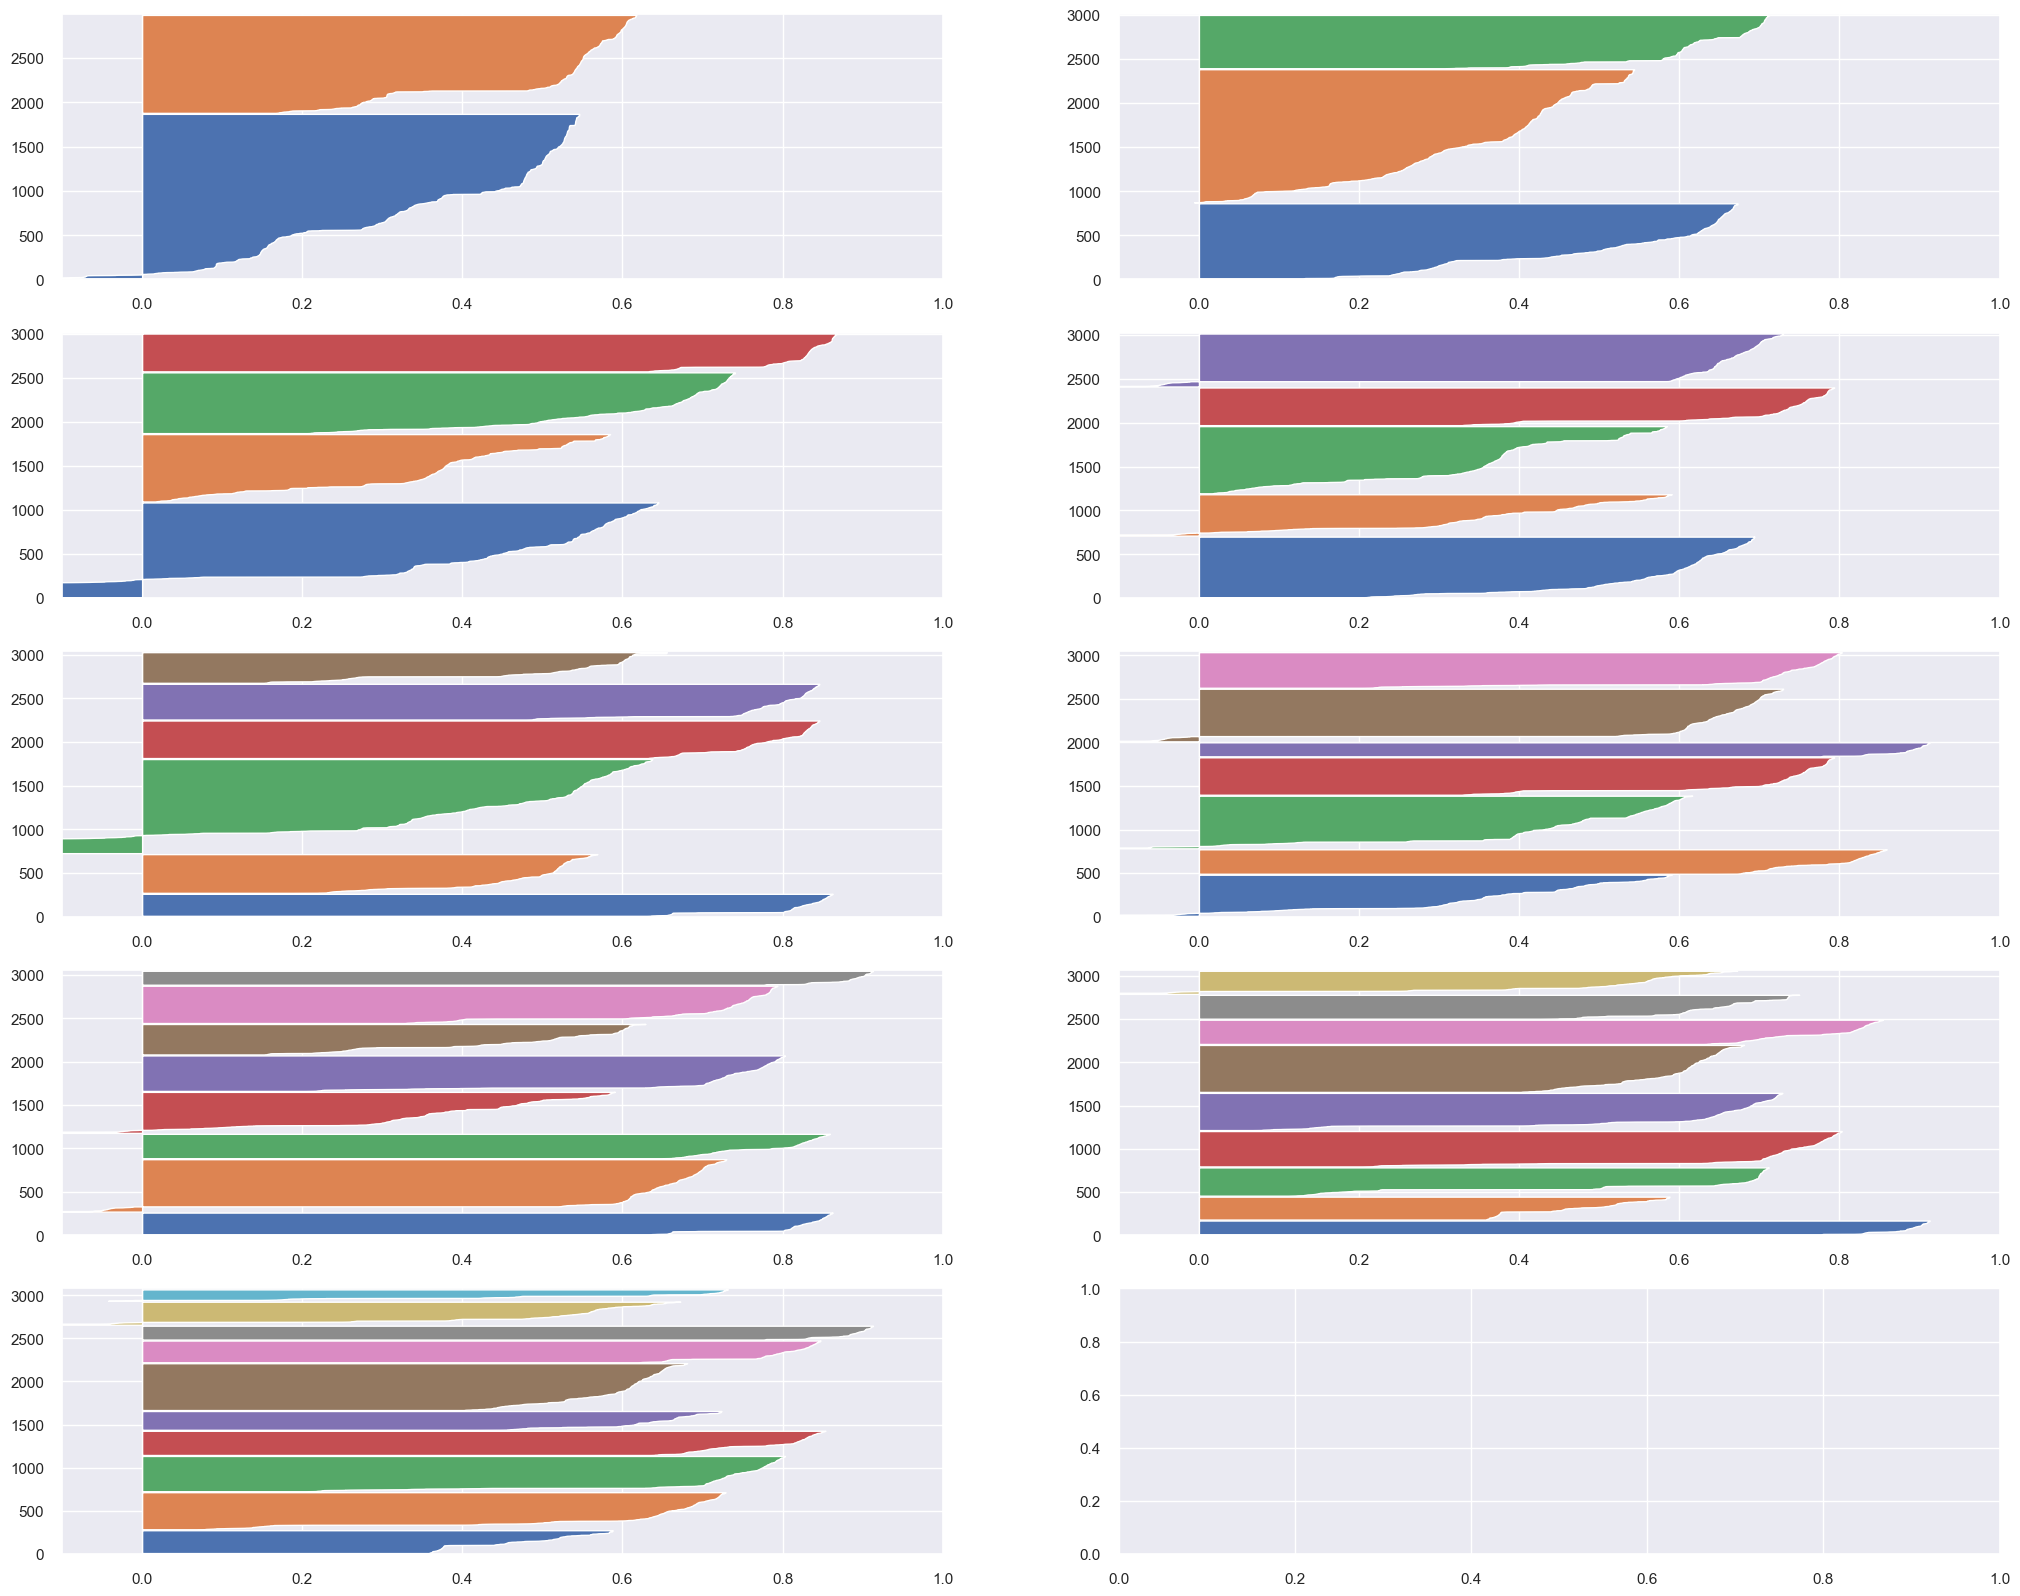

In [114]:
fig,ax = plt.subplots(5,2)
fig.set_size_inches(25,20)

for k in clusters:
    q,mod = divmod(k,2)
    
    ax[q-1,mod].set_xlim([-0.1,1])
    ax[q-1,mod].set_ylim([0,len(X) + (k+1)*10])
    # model definition
    gmm_model = mx.GaussianMixture(n_components=k)

    #model training
    gmm_model.fit(X)

    #model predict
    labels = gmm_model.predict(X)

    #model performace
    gmm_k = m.silhouette_score(X,labels,metric='euclidean')
    print(f'For K = {k} Silhouette: {gmm_k}')
    
    ss_values = m.silhouette_samples(X,labels)
    y_lower=10
    for i in range(k):

        ith_ss_values = ss_values[labels==i]
        size_cluster = ith_ss_values.shape[0]
        ith_ss_values = np.sort(ith_ss_values)
        y_upper = y_lower + size_cluster
        ax[q-1,mod].fill_betweenx(np.arange(y_lower,y_upper),0,ith_ss_values)
        y_lower = y_upper+10

## Within-Cluster Sum of Square (WSS)

In [115]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10,max_iter=300,random_state=42)
    #model training
    kmeans.fit(X)
    
    wss.append(kmeans.inertia_)

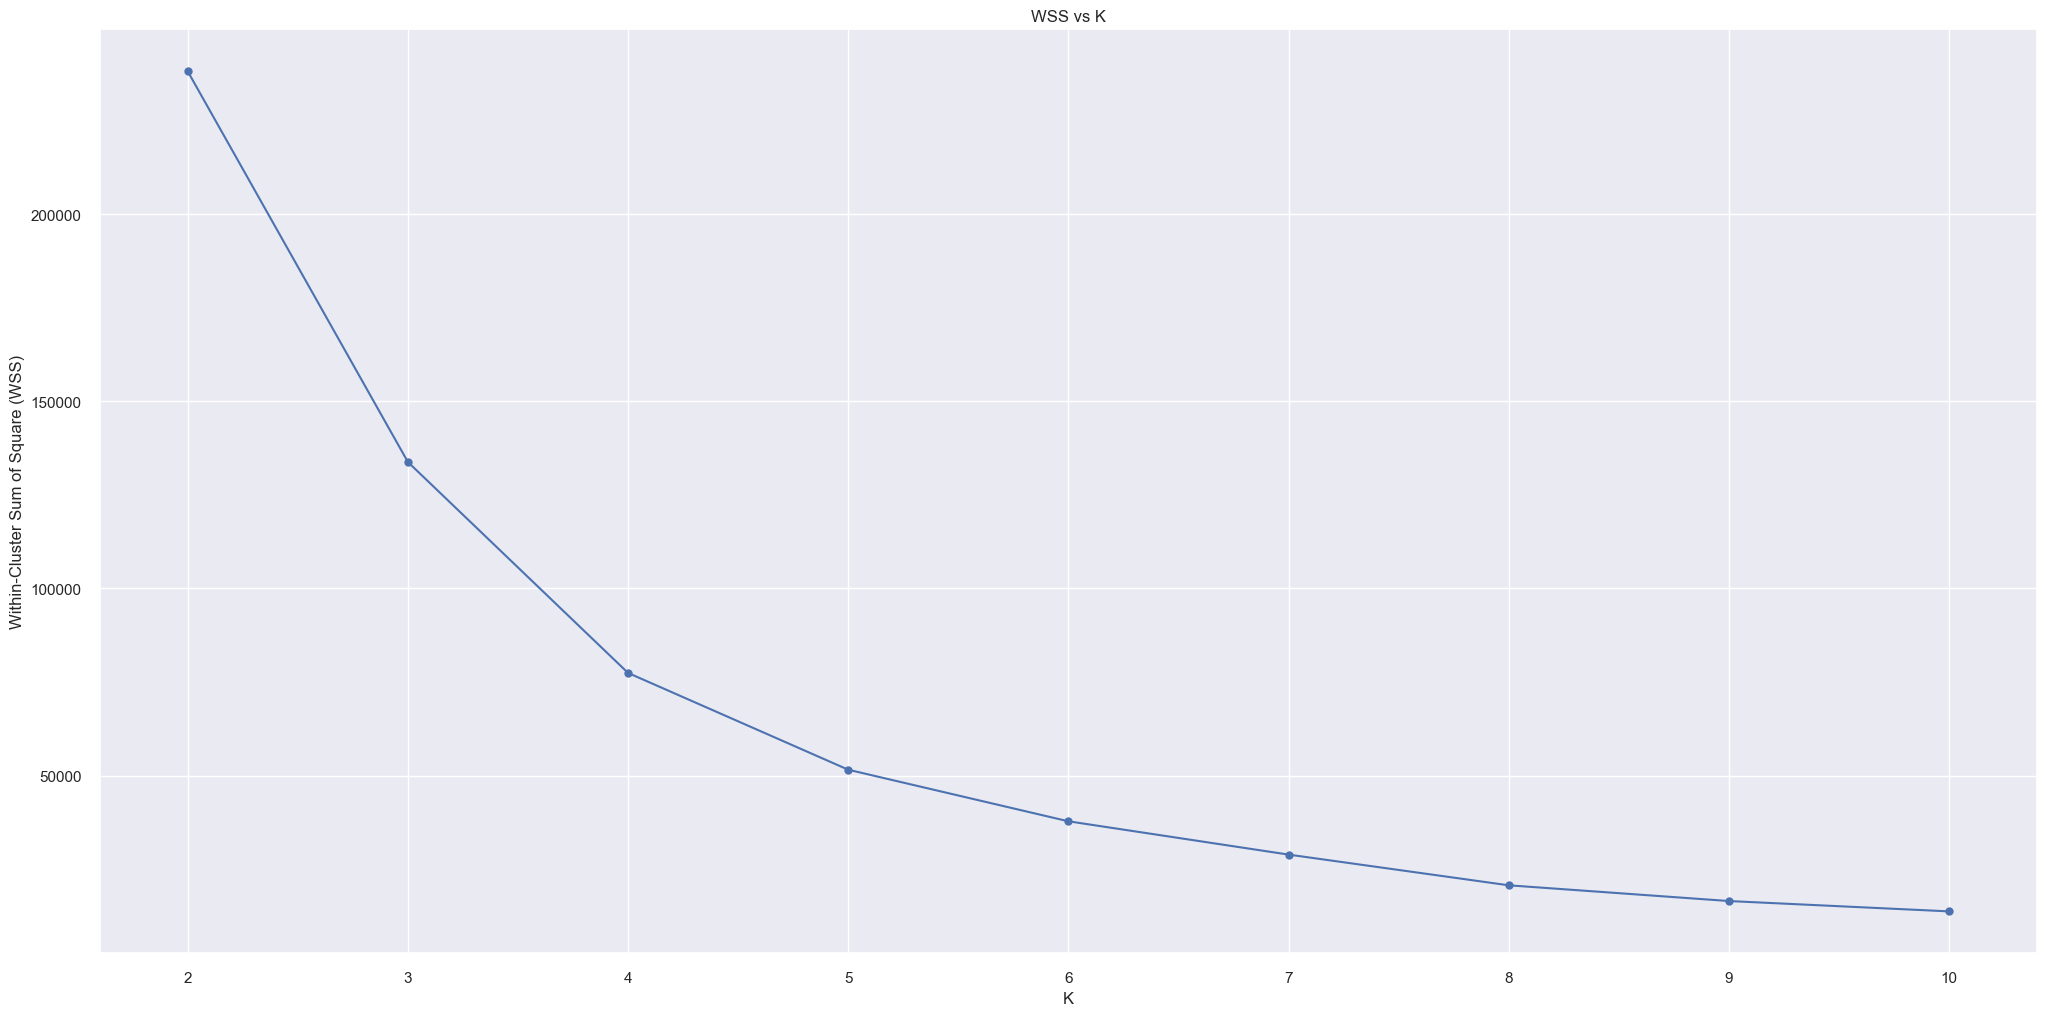

In [116]:
plt.plot(clusters,wss, marker = 'o');
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square (WSS)');
plt.title('WSS vs K');

Escolher os pontos com maior variação

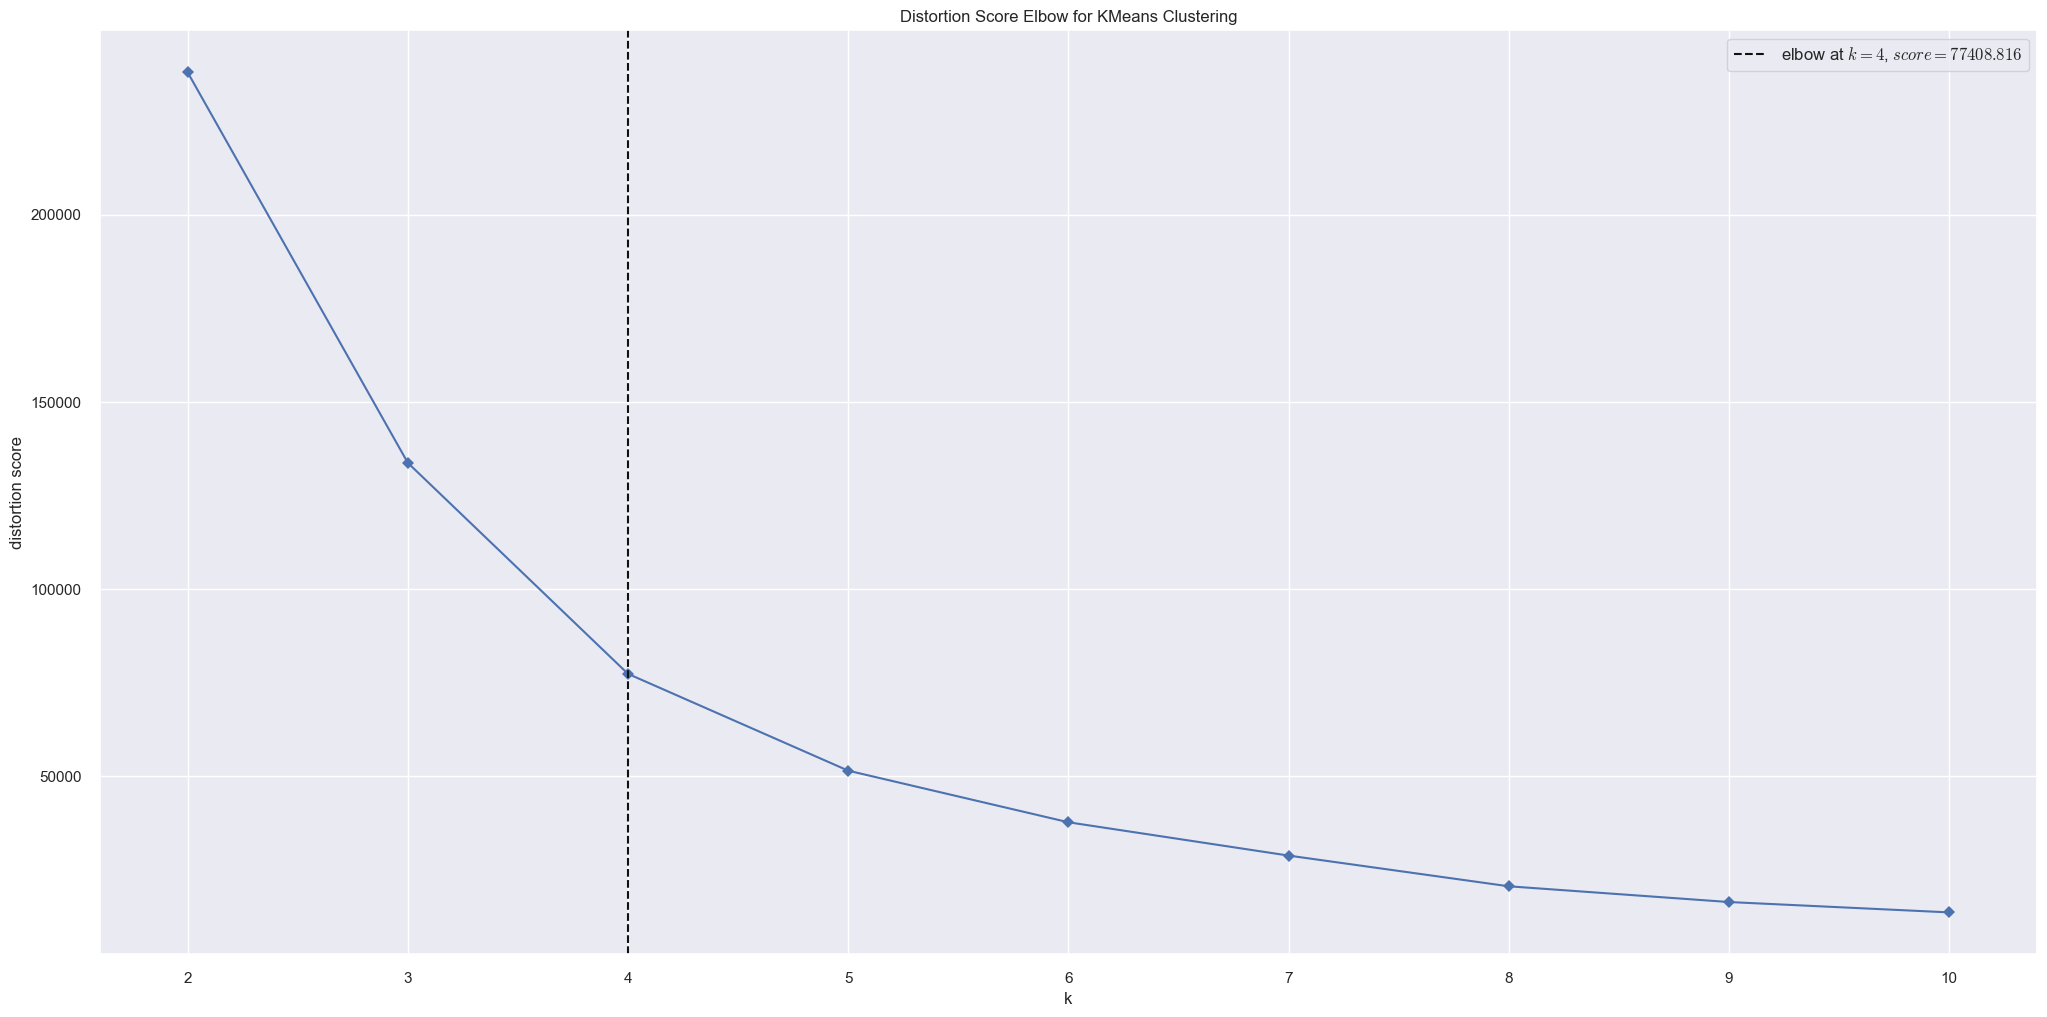

In [117]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,timings=False)
kmeans.fit(X)
kmeans.show();

## Sillhouete Score

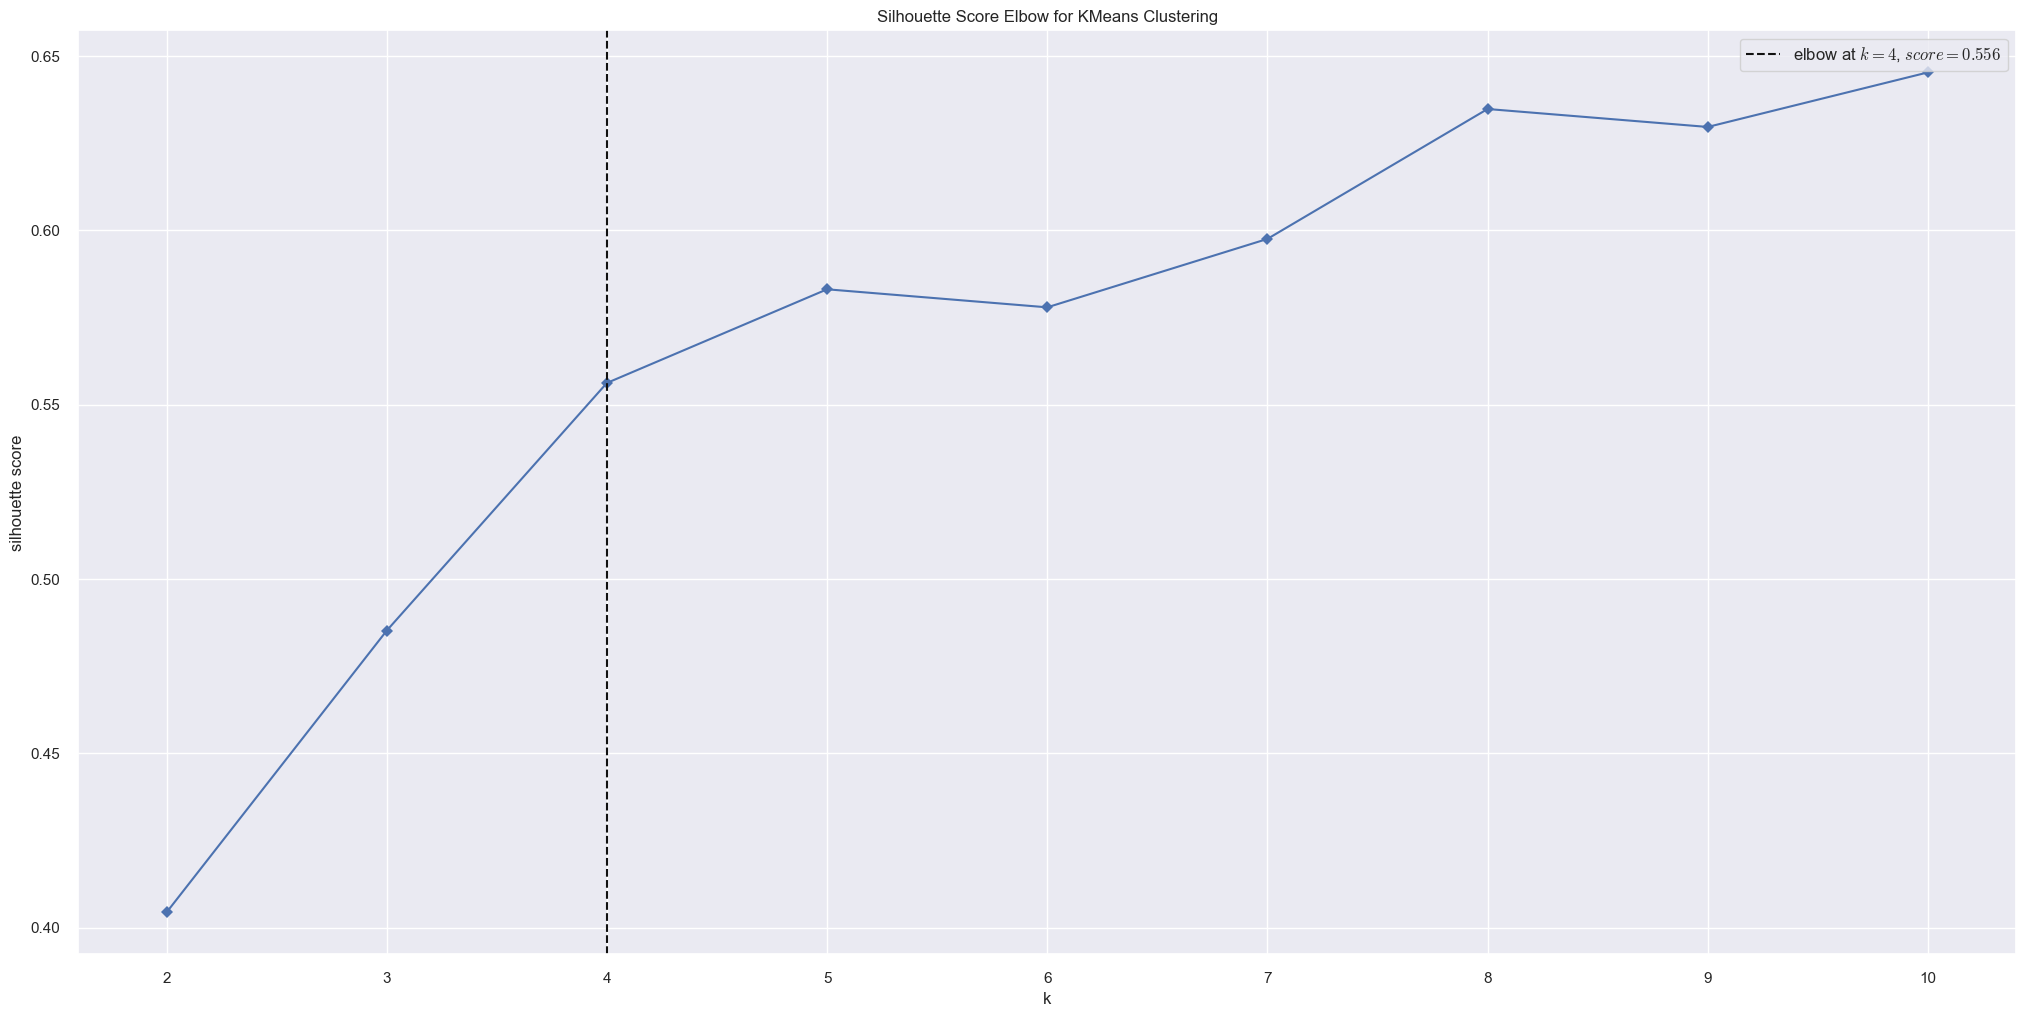

In [118]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,metric='silhouette',timings=False)
kmeans.fit(X)
kmeans.show();

## Silhouete analisys

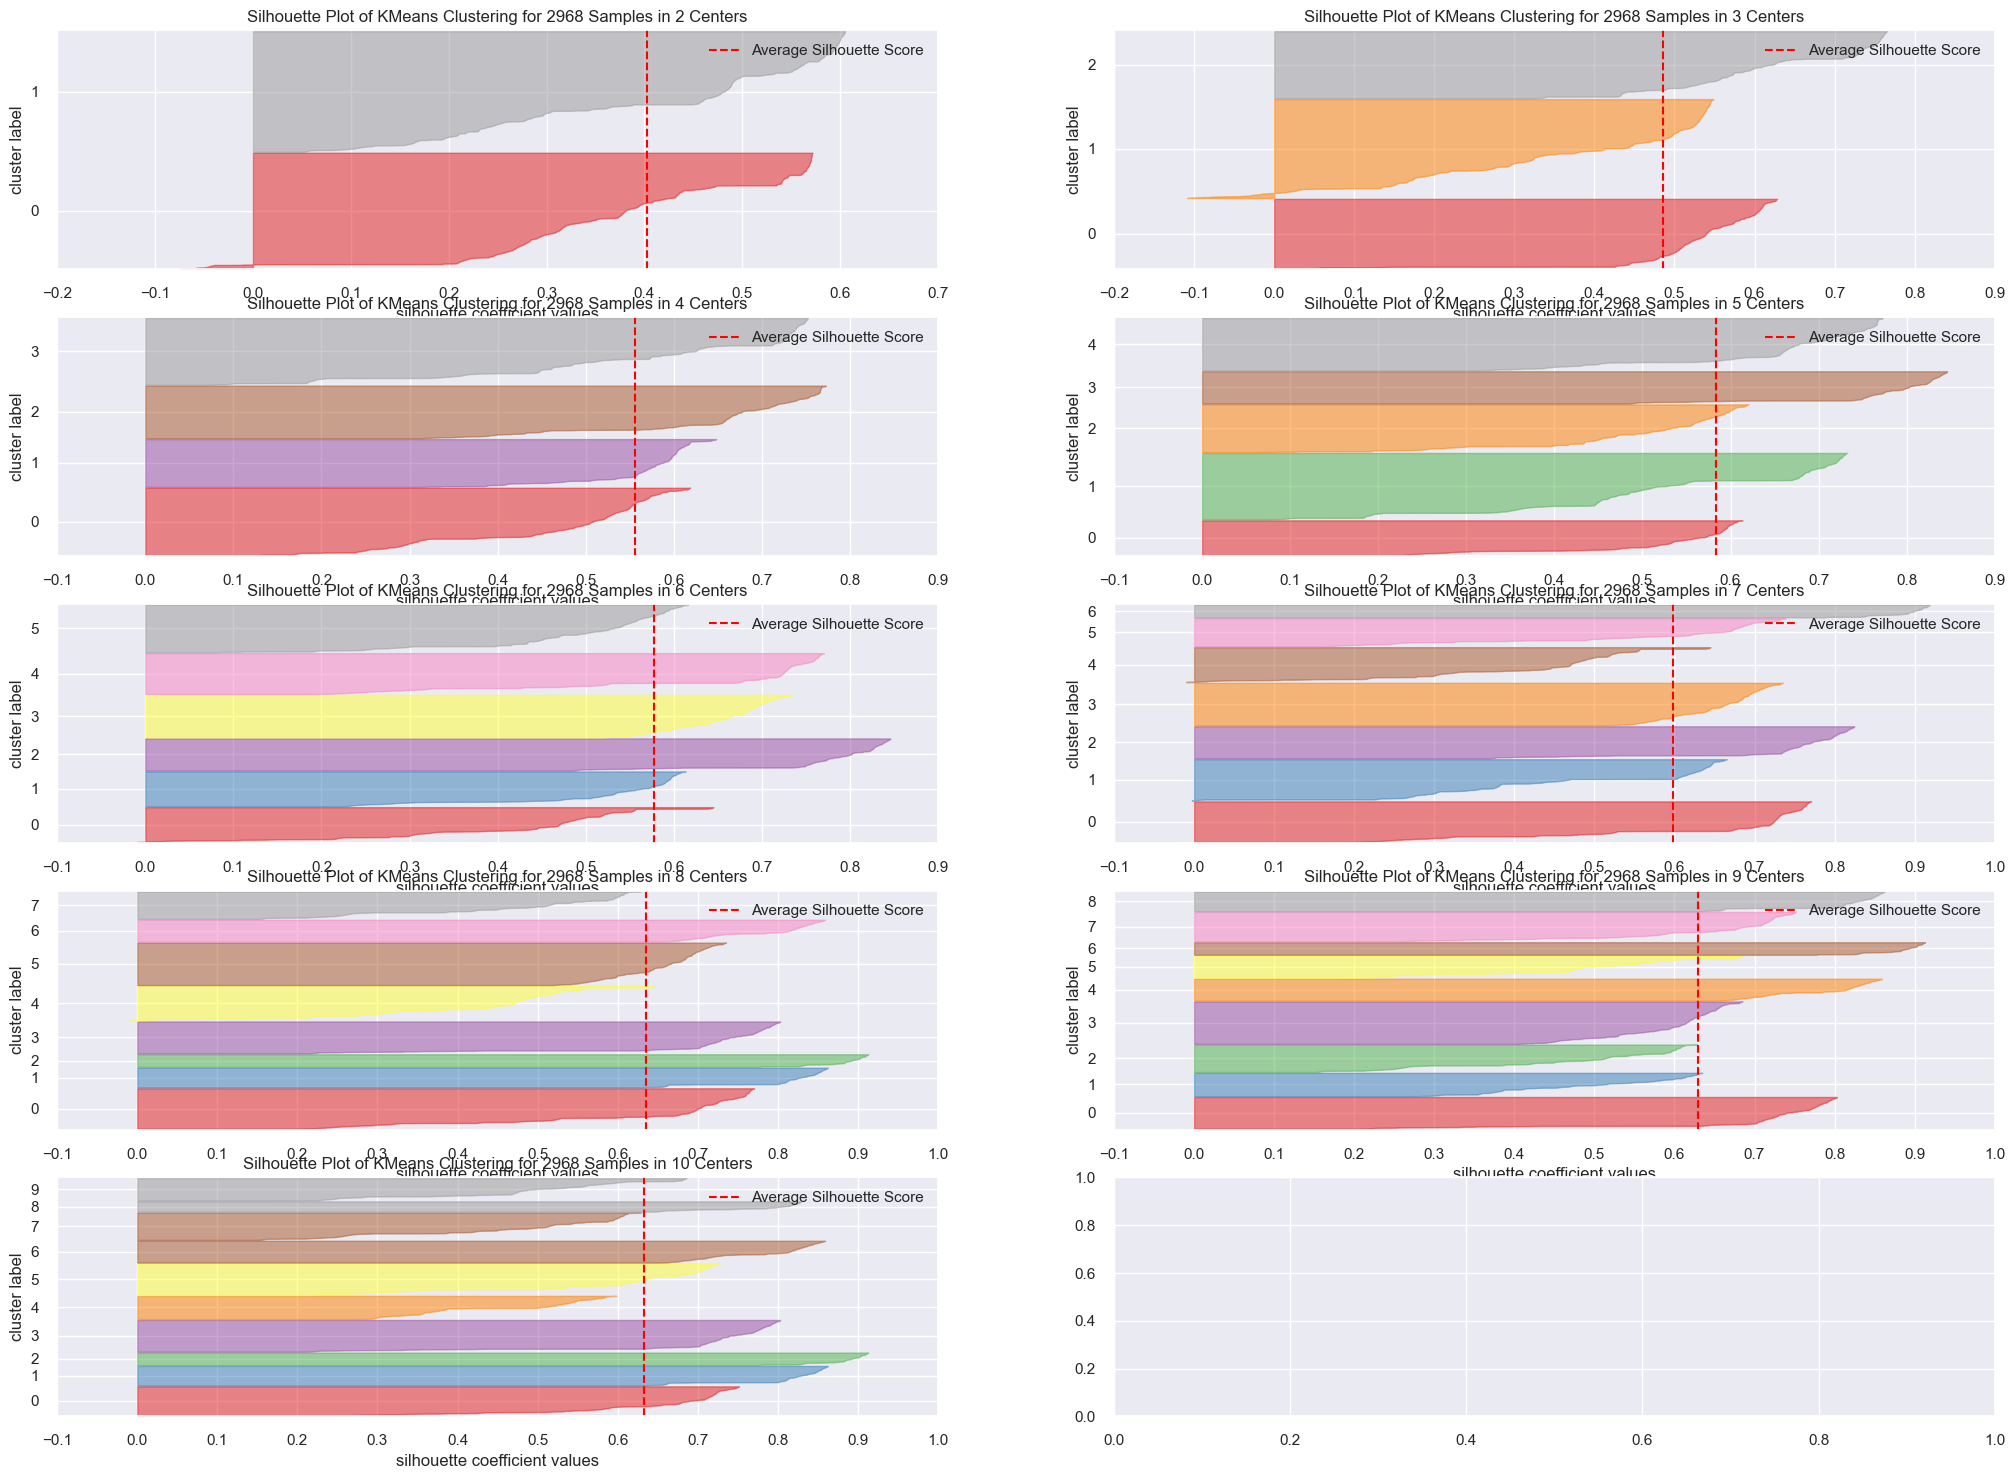

In [119]:
fig, ax = plt.subplots(5,2,figsize=(25,18))
#k=2
for k in clusters:
    from sklearn import cluster as c
    km = c.KMeans(n_clusters=k,init='random',n_init=10, max_iter=100,random_state=42)
    l,c = divmod(k,2)
    visualizer = SilhouetteVisualizer(km, color='yellowbrick',ax=ax[l-1][c])
    visualizer.fit(X)
    visualizer.finalize()

# Model training

## K-means

In [439]:
from sklearn import cluster as c

In [440]:
#model training
k = 8
# kmeans = c.KMeans(init='random',n_clusters=k,n_init=10,max_iter=300,random_state=42)
# #model training
# kmeans.fit(X)
# #clustering
# labels = kmeans.labels_

In [441]:
gmm_model = mx.GaussianMixture(n_components=k,random_state=32)

gmm_model.fit(X)

labels = gmm_model.predict(X)

In [442]:
# # index od new cluster name
# idx = np.argsort(gmm_model.means_.sum(axis=1))

# #new cluster label
# new_cluster_label = np.zeros_like(idx)
# new_cluster_label

# # cluster name
# cluster_name = [10,11,12,13,14,15,16,17]

# # assigning new cluster names
# new_cluster_label[idx] = cluster_name
# labels = new_cluster_label[labels]

### Cluster validation

In [443]:
# # WSS
# print('WSS value',kmeans.inertia_)

## SS (Silhouette Score)
print('SS value',m.silhouette_score(X,labels,metric='euclidean'))

SS value 0.61902535


### Cluster analysis

In [444]:
df9 = df5.copy()
df9['clusters'] = labels

In [445]:
# visualizer = SilhouetteVisualizer(kmeans,colors='yellowbrick')
# visualizer.fit(X)
# visualizer.finalize()

In [446]:
X

,embedding_x,embedding_y
0,12.976369,18.504473
1,12.428540,12.565516
2,14.296907,17.756611
3,-9.786930,1.187126
4,1.730409,5.397947
...,...,...
2963,-9.272949,1.461691
2964,2.596231,5.650211
2965,10.618380,18.832979
2966,12.294449,5.468173


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

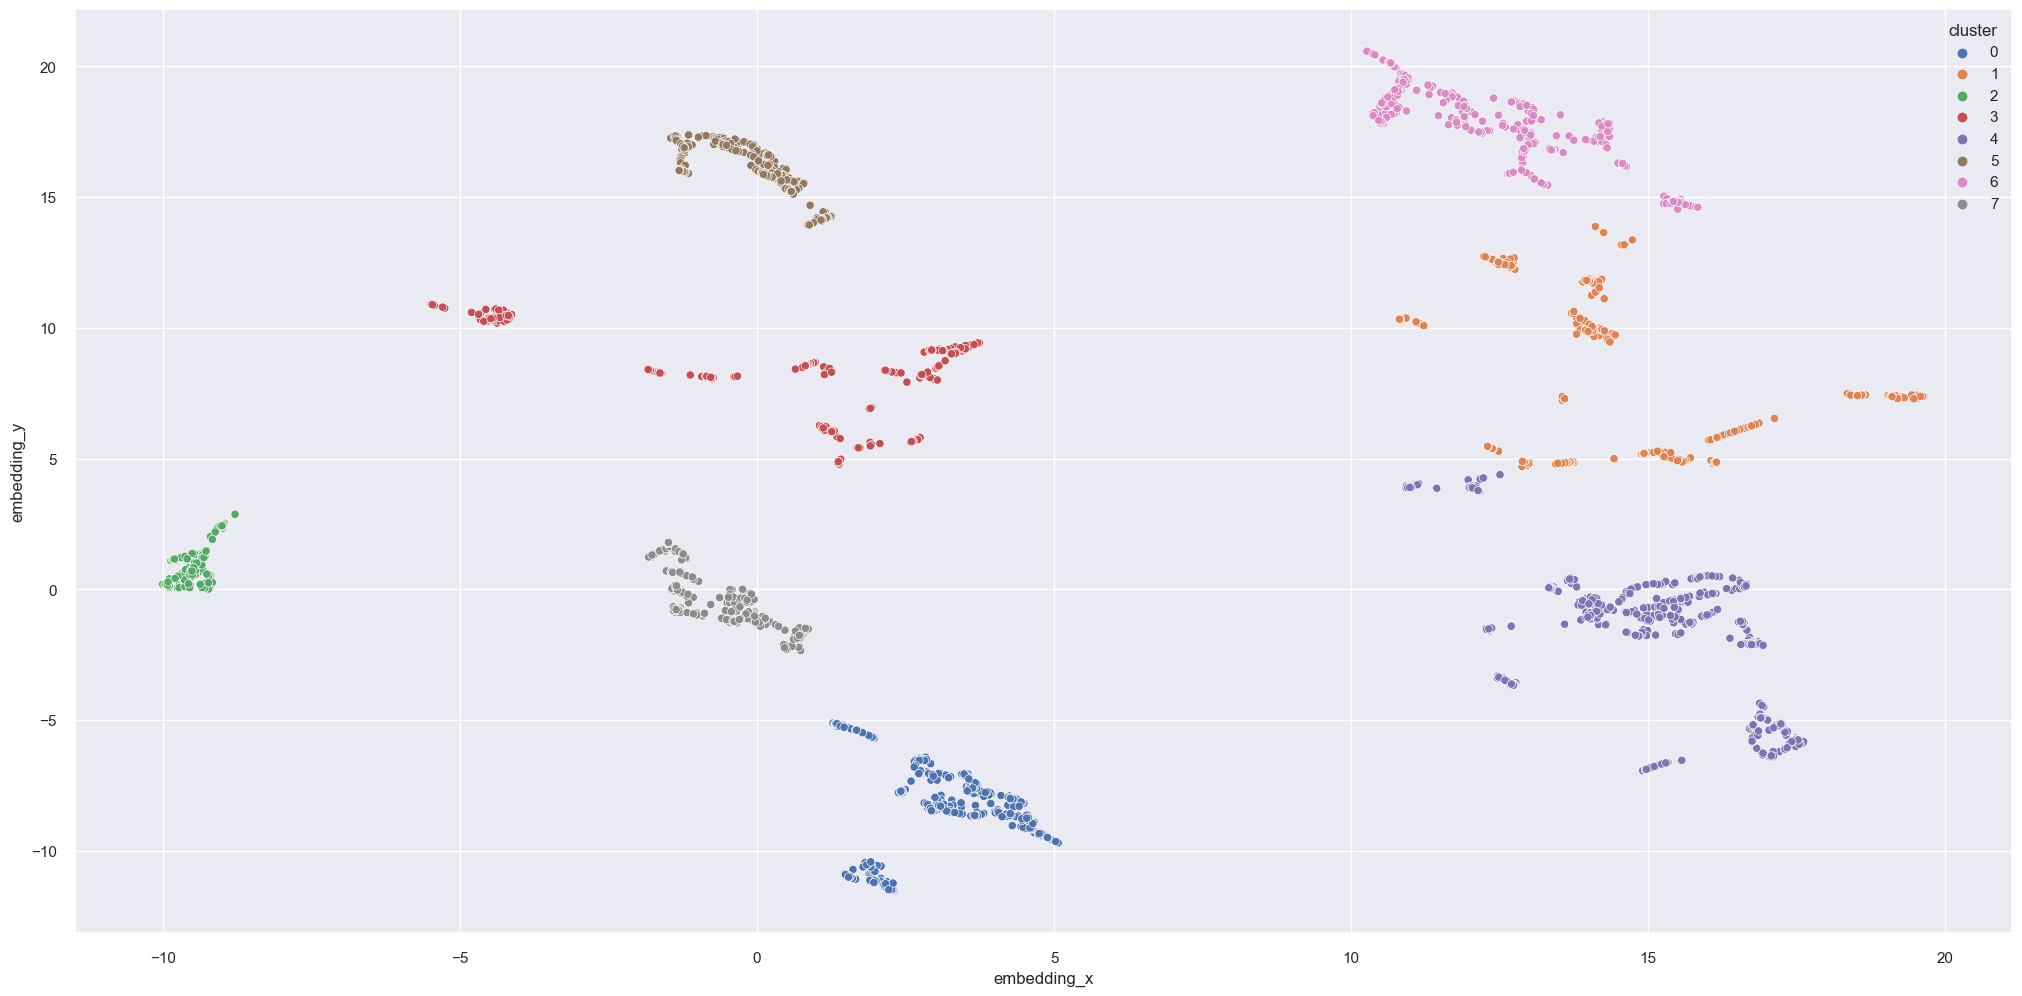

In [447]:
df_aux = X.copy()
df_aux['cluster'] = labels
sns.scatterplot(x='embedding_x', y='embedding_y',hue='cluster',data=df_aux,palette='deep')

### UMAP - t-SNE
### Machine leraning - Manifold
PCA - Matrix, Espaço de distâncias - 9 condições - Colorários
UMAP, T-SNE (2009) - Manifold - Topologia

**UMAP**

In [448]:
import umap.umap_ as umap

In [449]:
# reducer = umap.UMAP(n_neighbors=100,random_state=42)
# embedding = reducer.fit_transform(X)

In [450]:
# df_viz['embedding_x'] = embedding[:,0]
# df_viz['embedding_y'] = embedding[:,1]

# sns.scatterplot(x='embedding_x',y='embedding_y',hue='clusters', palette=sns.color_palette('hls',n_colors=len(df_viz['clusters'].unique())),data = df_viz)

In [451]:
#fig = px.scatter_3d(df9,x='recency_days',y='invoice_no',z='gross_revenue',color='clusters')
#fig.show()

### Cluster profile

In [452]:
df9.head()

,customer_id,gross_revenue,recency_days,qtde_invoice,qtde_items,qtde_products,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns,clusters
0,17850.0,5391.21,372.0,34.0,1733.0,297.0,50.970588,8.735294,0.486111,18.152222,35.500000,21.0,6
1,13047.0,3232.59,56.0,9.0,1390.0,171.0,154.444444,19.000000,0.048780,18.904035,27.250000,6.0,1
2,12583.0,6705.38,2.0,15.0,5028.0,232.0,335.200000,15.466667,0.045699,28.902500,23.187500,50.0,6
3,13748.0,948.25,95.0,5.0,439.0,28.0,87.800000,5.600000,0.017921,33.866071,92.666667,0.0,2
4,15100.0,876.00,333.0,3.0,80.0,3.0,26.666667,1.000000,0.136364,292.000000,8.600000,22.0,3


In [453]:
# number of customers
df_cluster = df9[['customer_id','clusters']].groupby('clusters').count().reset_index()
df_cluster['perc_customer'] = (df_cluster['customer_id']/df_cluster['customer_id'].sum())*100
# Avg gross revenue
df_avg_gross_revenue = df9[['gross_revenue','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_gross_revenue,how='inner',on='clusters')

# avg recency days
df_avg_recency_days =  df9[['recency_days','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_recency_days,how='inner',on='clusters')

# avg invoice no
df_avg_invoice_no =  df9[['qtde_products','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_invoice_no,how='inner',on='clusters')

df_ticket =  df9[['freq','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_ticket,how='inner',on='clusters')

df_ticket =  df9[['qtde_returns','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_ticket,how='inner',on='clusters')

In [454]:
df_cluster.sort_values(by='gross_revenue',ascending=False)

,clusters,customer_id,perc_customer,gross_revenue,recency_days,qtde_products,freq,qtde_returns
6,6,431,14.521563,9366.180348,20.197216,441.519722,0.064168,114.640371
1,1,473,15.936658,2785.321882,40.473573,150.035941,0.055353,15.532770
4,4,605,20.384097,2305.472645,52.770248,95.358678,0.041864,13.971901
0,0,410,13.814016,1212.552000,60.600000,53.280488,0.036804,4.839024
7,7,282,9.501348,955.203688,78.219858,36.588652,0.051705,4.475177
2,2,162,5.458221,818.923642,85.728395,27.925926,0.060581,3.086420
5,5,253,8.524259,580.367036,47.162055,11.300395,0.083773,1.418972
3,3,352,11.859838,547.058182,165.835227,16.147727,0.136322,13.744318


6 - Cluster Insiders

1 - Cluster More products

4 - Cluster Spend Money

0 - Cluster Even More products

7 - Cluster Less days

2 - Cluster Less 1k

5 - Cluster Stop Returns

3 - Cluster More buy

# EDA II

In [475]:
df10 = df9[cols_select].copy()
df10['clusters'] = df9['clusters']

In [476]:
df10.head()

,customer_id,gross_revenue,recency_days,qtde_products,freq,qtde_returns,clusters
0,17850.0,5391.21,372.0,297.0,0.486111,21.0,6
1,13047.0,3232.59,56.0,171.0,0.048780,6.0,1
2,12583.0,6705.38,2.0,232.0,0.045699,50.0,6
3,13748.0,948.25,95.0,28.0,0.017921,0.0,2
4,15100.0,876.00,333.0,3.0,0.136364,22.0,3


1. Fenomeno
2. Entidade (Customer, Location, Finace, Family)
3. Caracteristicas da entidade( Customer = Nome, Idade, Salário, escolaridade

## Hipóteses

1. Afirmação
2. Comparação entre variáveis.
3. Calor base de comparação

### Hipóteses Compra

1. Os clientes do cluster insiders usam cartão de crédito em 80% das compras (x)
2. Os clientes do cluster insiders possuem um ticket médio de 10% acima do cluster More products.(x)
3. Os clientes do cluster insiders possuem um basket size acima de 5 produtos.(x)
4. Os clientes do cluster insiders possuem um volume ( produtos ) de compras acima de 10% do total de compras.(v)
5. Os clientes do cluster insiders possuem um número de devoluções abaixo da média da base total de clientes.(v)
6. Os clientes do cluster insiders possuem um volume (faturamento) de compras acima de 10% do total de compras(v)

**Os clientes do cluster insiders possuem um volume ( produtos ) de compras acima de 10% do total de compras.**

In [477]:
(df10[df10['clusters']==6]['qtde_products'].sum()/df10['qtde_products'].sum())*100

52.252432836148756

Verdadeiro, o clusters insiders possui 57% do total de vendas de produtos

**Os clientes do cluster insiders possuem um número de devoluções abaixo da média da base total de clientes.**

In [478]:
df10['qtde_returns'].mean()

24.984164420485175

In [479]:
df10[df10['clusters']==6]['qtde_returns'].mean()

114.64037122969837

Falso, possuem um número de devoluções maior que a média geral

**Os clientes do cluster insiders possuem um volume (faturamento) de compras acima de 10% do total de compras**

In [480]:
(df10[df10['clusters']==6]['gross_revenue'].sum()/df10['gross_revenue'].sum())

0.5053819708640744

Verdadeiro, o clusters insiders possui 54,4% do total de faturamento

### Hipóteses Produto

1. 30% de todos os produtos em pacotes grandes são comprados pelos clientes do cluster insiders.(x)
2. A mediana dos preços dos produtos compadors pelos clientes do cluster insider é 10% maior do que a mediana de todos os preços dos produtos.(v)
3. A distribuição dos preços dos produtos comprados pelos clientes do cluster insider tem média maior que(x)
4. O percentil do faturamento dos clientes insiders.(v)
5. O peso médio dos produtos do cluster insiders é maior do que o peso dos produtos comprados no geral.(x)
6. a i dade média dos produtos dos clientes do cluster insiders é menor de 15 dias(x)

**A mediana do faturamento dos clientes do cluster insider é 10% maior do que a mediana do faturamento geral.**

In [481]:
gross_med_diff = (df10[df10['clusters']==6]['gross_revenue'].median() - df10['gross_revenue'].median())/df10['gross_revenue'].median()
gross_med_diff*100

287.4140261369769

Verdadeiro,  a mediana do cluster insider é 268% maior que o geral

**O percentil do faturamento dos clientes insiders**

In [482]:
np.percentile(df10[df10['clusters']==6]['gross_revenue'],q=0.1)

631.4849

In [483]:
np.percentile(df10[df10['clusters']==6]['gross_revenue'],q=0.9)

901.9013

C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross_revenue'>

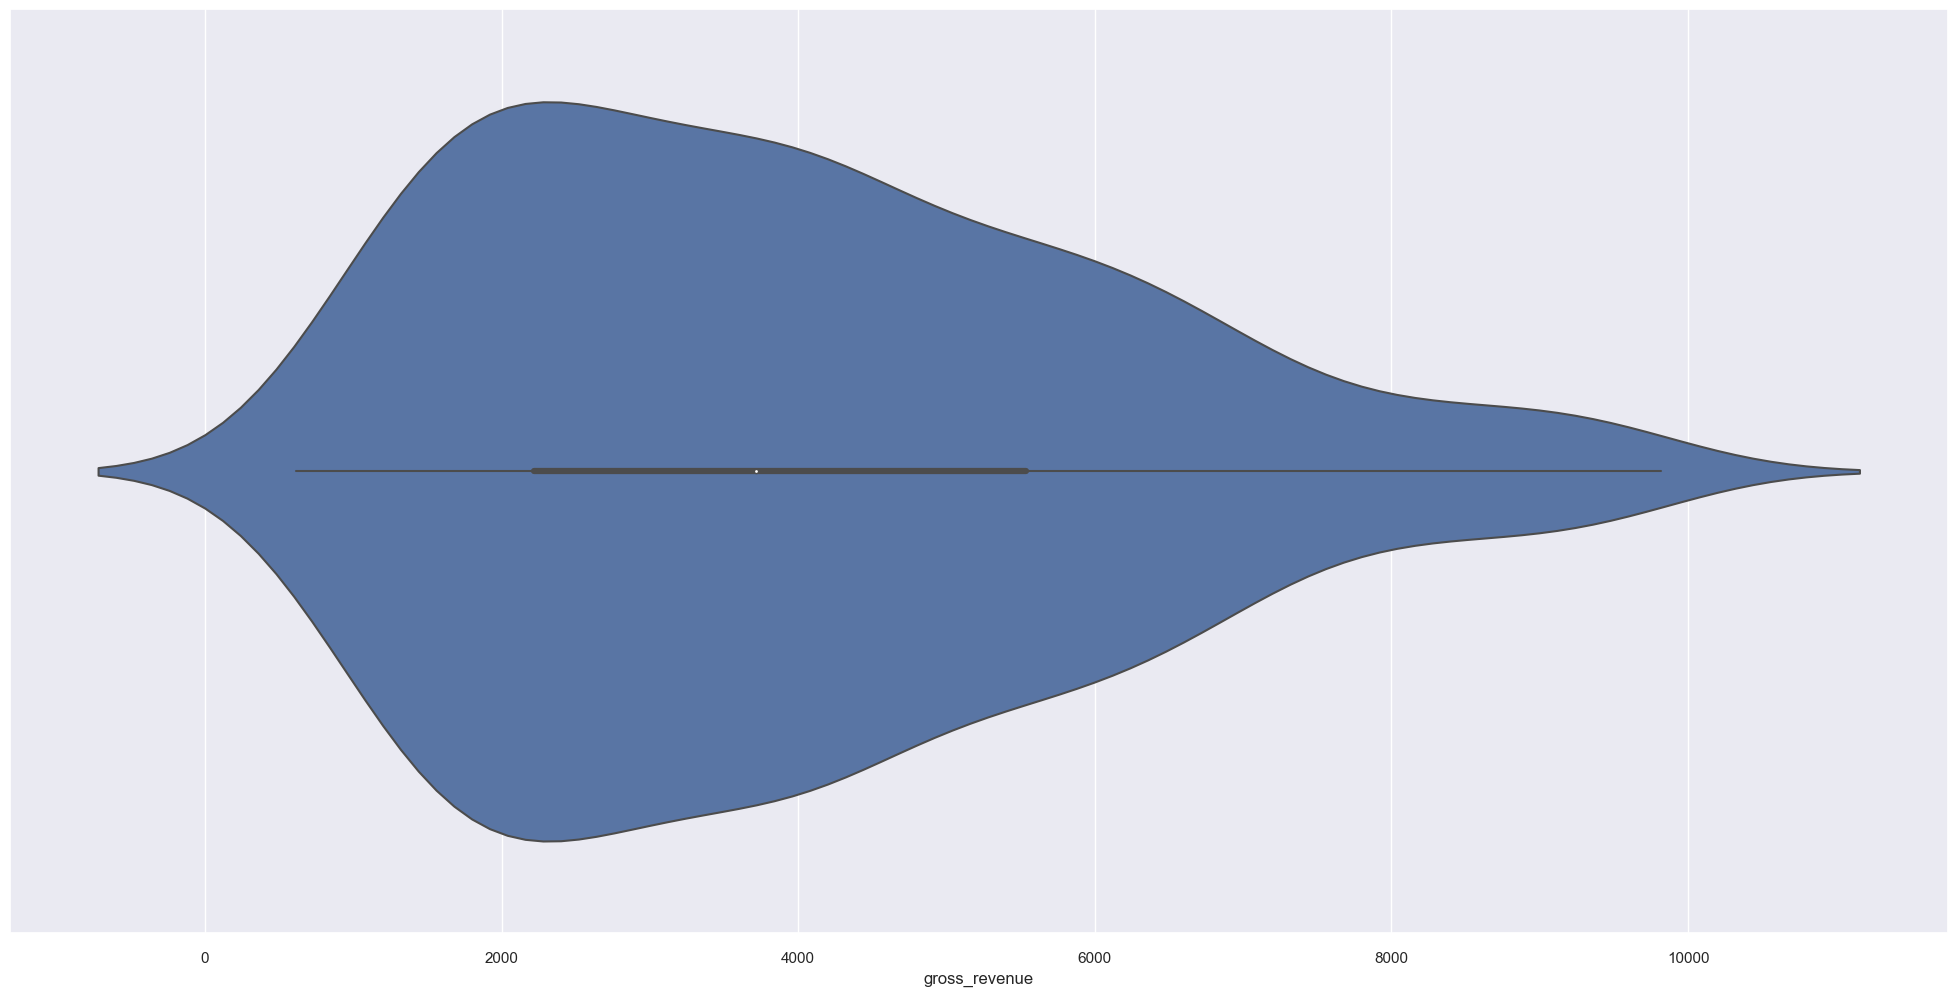

In [484]:
sns.violinplot(df10.loc[(df10['clusters']==6)&(df10['gross_revenue']<10000),'gross_revenue'])

C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross_revenue'>

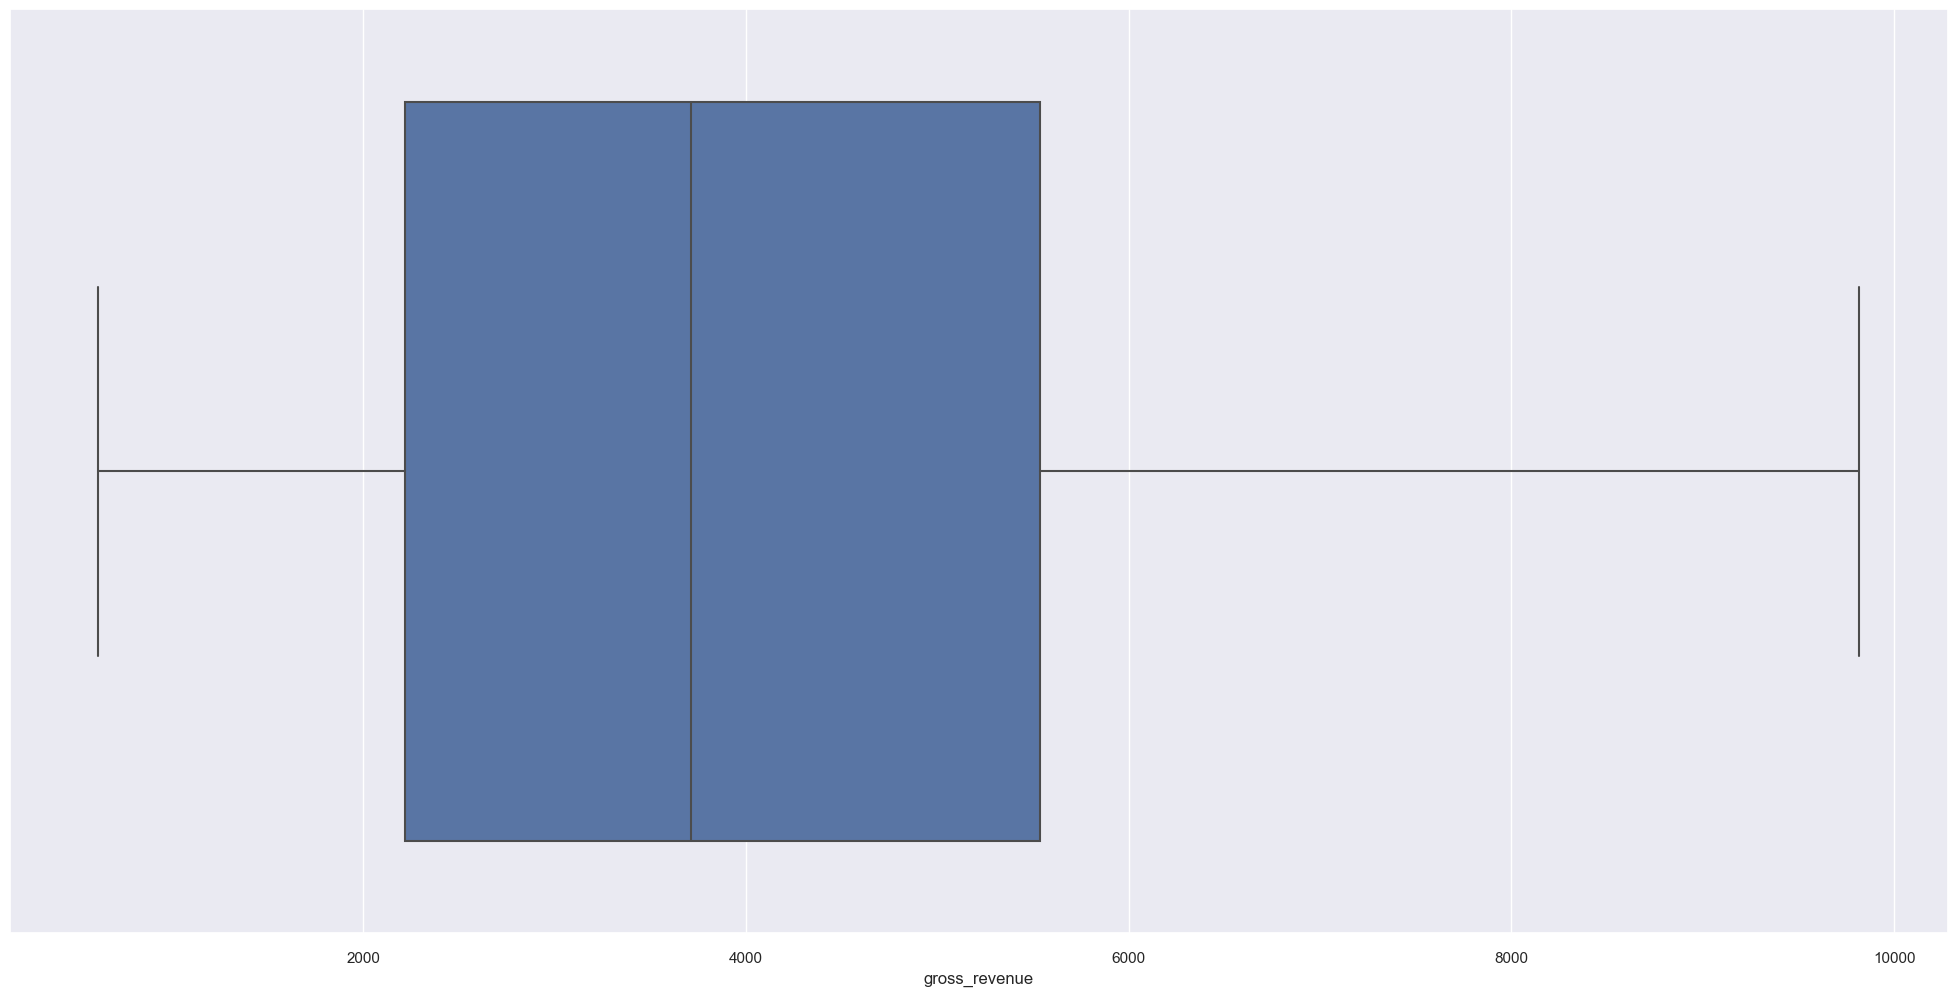

In [485]:
sns.boxplot(df10.loc[(df10['clusters']==6)&(df10['gross_revenue']<10000),'gross_revenue'])

### Hipóteses Cliente

1. Os clientes do cluster insiders correspondem a 80% do estado civil solteiro.(x)
2. 10 % dos clientes do cluster insiders estão na faixa de 24-35 anos.(x)
3. 40% das localidades de entrega estão dentro de um raio de 50km.(x)
4. 10% das localodade de entrega do cluster insiders estão dentro do reino unido.(x)
5. 90% dos clientes do cluster insiders ganham mais de 100 mil por mês(x)

## Perguntas de negócio


1. Quem são as pessoas elegíveis para participar do programa de Insiders ?

In [486]:
df10[df10['clusters']==6]['customer_id'].head()

0     17850.0
2     12583.0
6     14688.0
8     15311.0
12    16029.0
Name: customer_id, dtype: float64

2. Quantos clientes farão parte do grupo?

In [487]:
df10[df10['clusters']==6]['customer_id'].size

431

3. Quais as principais características desses clientes ?

In [488]:
df_cluster[df_cluster['clusters']==6]

,clusters,customer_id,perc_customer,gross_revenue,recency_days,qtde_products,freq,qtde_returns
6,6,431,14.521563,9366.180348,20.197216,441.519722,0.064168,114.640371


4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?

In [489]:
df10[df10['clusters']==6]['gross_revenue'].sum()/df10['gross_revenue'].sum()

0.5053819708640744

5. Qual a expectativa de faturamento desse grupo para os próximos meses ?

6. Quais as condições para uma pessoa ser elegível ao Insiders ?

In [490]:
from scipy import stats as st

In [491]:
df_insiders = df10[df10['clusters']==6]['gross_revenue']

st.t.interval(alpha=0.5,df=len(df_insiders)-1,loc=np.mean(df_insiders),scale=st.sem(df_insiders))

(8658.960688178571, 10073.400007877115)

7. Quais as condições para uma pessoa ser removida do Insiders ?

8. Qual a garantia que o programa Insiders é melhor que o restante da base ?